In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
from scipy.stats import zscore

import matplotlib.pyplot as plt   
%matplotlib inline 

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

from imblearn.over_sampling import SMOTE 
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

import warnings
warnings.filterwarnings("ignore")

In [2]:
df1 = pd.read_csv("Mobile Dataset.csv")
df1.head().T

,0,1,2,3,4
Taken_product,1,0,1,0,0
Yearly_avg_view_on_travel_page,307.0,367.0,277.0,247.0,202.0
preferred_device,Mobile,Mobile,Mobile,Mobile,Mobile
total_likes_on_outstation_checkin_given,38570.0,9765.0,48055.0,48720.0,20685.0
yearly_avg_Outstation_checkins,1.0,1.0,1.0,1.0,1.0
member_in_family,2,1,2,4,1
preferred_location_type,Financial,Financial,Other,Financial,Medical
Yearly_avg_comment_on_travel_page,94.0,61.0,92.0,56.0,40.0
total_likes_on_outofstation_checkin_received,5993.0,5130.0,2090.0,2909.0,3468.0
week_since_last_outstation_checkin,8.0,1.0,6.0,1.0,9.0


In [3]:
df1.shape

(10652, 16)

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10652 entries, 0 to 10651
Data columns (total 16 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Taken_product                                 10652 non-null  int64  
 1   Yearly_avg_view_on_travel_page                10652 non-null  float64
 2   preferred_device                              10652 non-null  object 
 3   total_likes_on_outstation_checkin_given       10652 non-null  float64
 4   yearly_avg_Outstation_checkins                10652 non-null  float64
 5   member_in_family                              10652 non-null  int64  
 6   preferred_location_type                       10652 non-null  object 
 7   Yearly_avg_comment_on_travel_page             10652 non-null  float64
 8   total_likes_on_outofstation_checkin_received  10652 non-null  float64
 9   week_since_last_outstation_checkin            10652 non-null 

In [5]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Taken_product,10652.0,0.152084,0.359119,0.0,0.00,0.0,0.00,1.00
Yearly_avg_view_on_travel_page,10652.0,280.205642,66.567644,99.5,232.00,271.0,321.00,455.50
total_likes_on_outstation_checkin_given,10652.0,28170.414852,13937.016880,3570.0,16529.25,28076.0,40149.50,75242.25
yearly_avg_Outstation_checkins,10652.0,8.062336,8.682026,1.0,1.00,3.0,14.00,29.00
member_in_family,10652.0,2.924052,1.044928,1.0,2.00,3.0,4.00,10.00
Yearly_avg_comment_on_travel_page,10652.0,74.353173,21.556143,4.5,57.00,75.0,92.00,144.50
total_likes_on_outofstation_checkin_received,10652.0,6414.445644,4368.643190,1009.0,2945.75,4967.5,8394.25,16572.00
week_since_last_outstation_checkin,10652.0,3.224934,2.628021,0.0,1.00,3.0,5.00,11.00
following_company_page,10652.0,0.277225,0.447650,0.0,0.00,0.0,1.00,1.00
montly_avg_comment_on_company_page,10652.0,22.486481,7.370521,11.0,17.00,22.0,27.00,42.00


In [6]:
df1.isnull().sum()

Taken_product                                   0
Yearly_avg_view_on_travel_page                  0
preferred_device                                0
total_likes_on_outstation_checkin_given         0
yearly_avg_Outstation_checkins                  0
member_in_family                                0
preferred_location_type                         0
Yearly_avg_comment_on_travel_page               0
total_likes_on_outofstation_checkin_received    0
week_since_last_outstation_checkin              0
following_company_page                          0
montly_avg_comment_on_company_page              0
working_flag                                    0
travelling_network_rating                       0
Adult_flag                                      0
Daily_Avg_mins_spend_on_traveling_page          0
dtype: int64

In [7]:
df1c=df1.copy()
df1c

,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,1,307.0,Mobile,38570.0,1.0,2,Financial,94.0,5993.0,8.0,1,11.0,0,1.0,0,8.0
1,0,367.0,Mobile,9765.0,1.0,1,Financial,61.0,5130.0,1.0,0,23.0,1,4.0,1,10.0
2,1,277.0,Mobile,48055.0,1.0,2,Other,92.0,2090.0,6.0,1,15.0,0,2.0,0,7.0
3,0,247.0,Mobile,48720.0,1.0,4,Financial,56.0,2909.0,1.0,1,11.0,0,3.0,0,8.0
4,0,202.0,Mobile,20685.0,1.0,1,Medical,40.0,3468.0,9.0,0,12.0,0,4.0,1,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10647,0,247.0,Mobile,11418.0,5.0,3,Historical site,99.0,9983.0,1.0,0,28.0,0,2.0,0,16.0
10648,0,210.0,Mobile,40886.0,5.0,3,Other,53.0,3024.0,2.0,0,32.0,0,4.0,0,14.0
10649,0,305.0,Mobile,21510.0,6.0,1,Historical site,55.0,10041.0,4.0,0,30.0,0,1.0,1,11.0
10650,0,214.0,Mobile,5478.0,4.0,3,Beach,103.0,6203.0,3.0,1,40.0,1,2.0,1,12.0


In [8]:
df1c['preferred_location_type'].value_counts()

Financial          2409
Beach              1963
Medical            1845
Historical site    1512
Social media        633
Other               587
Entertainment       533
Big Cities          528
Trekking            444
Tour and Travel     107
Hill Stations        84
OTT                   7
Name: preferred_location_type, dtype: int64

In [9]:
print('Feature: Preferred location type')
print(pd.Categorical(df1c['preferred_location_type'].unique()))
print(pd.Categorical(df1c['preferred_location_type'].unique()).codes)
df1c['preferred_location_type'] = pd.Categorical(df1c['preferred_location_type']).codes

Feature: Preferred location type
['Financial', 'Other', 'Medical', 'Beach', 'Entertainment', ..., 'OTT', 'Historical site', 'Big Cities', 'Trekking', 'Hill Stations']
Length: 12
Categories (12, object): ['Beach', 'Big Cities', 'Entertainment', 'Financial', ..., 'Other', 'Social media', 'Tour and Travel', 'Trekking']
[ 3  8  6  0  2  9 10  7  5  1 11  4]


In [10]:
df1c['preferred_location_type'].value_counts()

3     2409
0     1963
6     1845
5     1512
9      633
8      587
2      533
1      528
11     444
10     107
4       84
7        7
Name: preferred_location_type, dtype: int64

In [11]:
df_mobile = df1c.copy()
df_mobile.head()

,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,1,307.0,Mobile,38570.0,1.0,2,3,94.0,5993.0,8.0,1,11.0,0,1.0,0,8.0
1,0,367.0,Mobile,9765.0,1.0,1,3,61.0,5130.0,1.0,0,23.0,1,4.0,1,10.0
2,1,277.0,Mobile,48055.0,1.0,2,8,92.0,2090.0,6.0,1,15.0,0,2.0,0,7.0
3,0,247.0,Mobile,48720.0,1.0,4,3,56.0,2909.0,1.0,1,11.0,0,3.0,0,8.0
4,0,202.0,Mobile,20685.0,1.0,1,6,40.0,3468.0,9.0,0,12.0,0,4.0,1,6.0


In [12]:
df_mobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10652 entries, 0 to 10651
Data columns (total 16 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Taken_product                                 10652 non-null  int64  
 1   Yearly_avg_view_on_travel_page                10652 non-null  float64
 2   preferred_device                              10652 non-null  object 
 3   total_likes_on_outstation_checkin_given       10652 non-null  float64
 4   yearly_avg_Outstation_checkins                10652 non-null  float64
 5   member_in_family                              10652 non-null  int64  
 6   preferred_location_type                       10652 non-null  int8   
 7   Yearly_avg_comment_on_travel_page             10652 non-null  float64
 8   total_likes_on_outofstation_checkin_received  10652 non-null  float64
 9   week_since_last_outstation_checkin            10652 non-null 

In [13]:
df_mobile.shape

(10652, 16)

In [14]:
df_mobile

,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,1,307.0,Mobile,38570.0,1.0,2,3,94.0,5993.0,8.0,1,11.0,0,1.0,0,8.0
1,0,367.0,Mobile,9765.0,1.0,1,3,61.0,5130.0,1.0,0,23.0,1,4.0,1,10.0
2,1,277.0,Mobile,48055.0,1.0,2,8,92.0,2090.0,6.0,1,15.0,0,2.0,0,7.0
3,0,247.0,Mobile,48720.0,1.0,4,3,56.0,2909.0,1.0,1,11.0,0,3.0,0,8.0
4,0,202.0,Mobile,20685.0,1.0,1,6,40.0,3468.0,9.0,0,12.0,0,4.0,1,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10647,0,247.0,Mobile,11418.0,5.0,3,5,99.0,9983.0,1.0,0,28.0,0,2.0,0,16.0
10648,0,210.0,Mobile,40886.0,5.0,3,8,53.0,3024.0,2.0,0,32.0,0,4.0,0,14.0
10649,0,305.0,Mobile,21510.0,6.0,1,5,55.0,10041.0,4.0,0,30.0,0,1.0,1,11.0
10650,0,214.0,Mobile,5478.0,4.0,3,0,103.0,6203.0,3.0,1,40.0,1,2.0,1,12.0


In [15]:
df_mobile['preferred_device']=df_mobile['preferred_device'].replace({'Mobile':1})
df_mobile['preferred_device'].value_counts()

1    10652
Name: preferred_device, dtype: int64

In [16]:
X= df_mobile.drop(["Taken_product"],axis=1)
y=df_mobile.Taken_product
X.head()

,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,307.0,1,38570.0,1.0,2,3,94.0,5993.0,8.0,1,11.0,0,1.0,0,8.0
1,367.0,1,9765.0,1.0,1,3,61.0,5130.0,1.0,0,23.0,1,4.0,1,10.0
2,277.0,1,48055.0,1.0,2,8,92.0,2090.0,6.0,1,15.0,0,2.0,0,7.0
3,247.0,1,48720.0,1.0,4,3,56.0,2909.0,1.0,1,11.0,0,3.0,0,8.0
4,202.0,1,20685.0,1.0,1,6,40.0,3468.0,9.0,0,12.0,0,4.0,1,6.0


In [17]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Taken_product, dtype: int64

In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10652 entries, 0 to 10651
Data columns (total 15 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Yearly_avg_view_on_travel_page                10652 non-null  float64
 1   preferred_device                              10652 non-null  int64  
 2   total_likes_on_outstation_checkin_given       10652 non-null  float64
 3   yearly_avg_Outstation_checkins                10652 non-null  float64
 4   member_in_family                              10652 non-null  int64  
 5   preferred_location_type                       10652 non-null  int8   
 6   Yearly_avg_comment_on_travel_page             10652 non-null  float64
 7   total_likes_on_outofstation_checkin_received  10652 non-null  float64
 8   week_since_last_outstation_checkin            10652 non-null  float64
 9   following_company_page                        10652 non-null 

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)
X_train.head()

,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
3531,249.0,1,4161.0,16.0,3,9,82.0,5366.0,5.0,0,20.0,0,3.0,0,9.0
6990,426.0,1,50509.0,11.0,5,1,96.0,5384.0,4.0,0,20.0,0,3.0,1,6.0
6230,267.0,1,45611.0,2.0,4,0,66.0,2778.0,3.0,0,20.0,0,3.0,1,14.0
6062,239.0,1,34270.0,1.0,4,5,96.0,4348.0,0.0,0,15.0,0,4.0,1,6.0
9198,367.0,1,41208.0,26.0,4,0,111.0,16572.0,5.0,0,28.0,0,3.0,1,33.0


In [20]:
y_train.head()

3531    1
6990    0
6230    0
6062    0
9198    0
Name: Taken_product, dtype: int64

In [21]:
X_test.head()

,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
9636,351.0,1,36861.0,6.0,3,5,82.0,8937.0,8.0,0,27.0,0,4.0,0,25.0
4907,271.0,1,46072.0,1.0,4,8,45.0,16572.0,6.0,1,22.0,0,1.0,1,33.0
7220,260.0,1,22023.0,27.0,2,5,106.0,2323.0,2.0,0,24.0,0,4.0,0,9.0
2512,330.0,1,34335.0,1.0,3,3,90.0,3162.0,3.0,0,14.0,0,4.0,0,7.0
4485,234.0,1,26154.0,1.0,4,3,69.0,4474.0,1.0,0,42.0,1,4.0,0,15.0


In [22]:
y_test.head()

9636    0
4907    0
7220    0
2512    0
4485    0
Name: Taken_product, dtype: int64

In [23]:
X_train.shape

(7456, 15)

In [24]:
y_train.shape

(7456,)

In [25]:
X_test.shape

(3196, 15)

In [26]:
y_test.shape

(3196,)

In [27]:
#CART
dt_model = DecisionTreeClassifier(criterion = 'gini' )

In [28]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [29]:
train_char_label = ['No', 'Yes']
ld_Tree_File = open('ld_Tree_File.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=ld_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))
ld_Tree_File.close()

In [30]:
print(pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                                                   Imp
total_likes_on_outofstation_checkin_received  0.220059
total_likes_on_outstation_checkin_given       0.186563
yearly_avg_Outstation_checkins                0.098776
Yearly_avg_view_on_travel_page                0.080099
week_since_last_outstation_checkin            0.064179
member_in_family                              0.062909
Yearly_avg_comment_on_travel_page             0.057822
following_company_page                        0.051728
travelling_network_rating                     0.051246
Adult_flag                                    0.037587
Daily_Avg_mins_spend_on_traveling_page        0.036711
preferred_location_type                       0.023484
working_flag                                  0.014688
montly_avg_comment_on_company_page            0.014150
preferred_device                              0.000000


In [31]:
y_predict = dt_model.predict(X_test)
y_predict.shape

(3196,)

In [32]:
ytrain_predict = dt_model.predict(X_train)
ytest_predict = dt_model.predict(X_test)
print('ytrain_predict',ytrain_predict.shape)
print('ytest_predict',ytest_predict.shape)

ytrain_predict (7456,)
ytest_predict (3196,)


In [33]:
ytest_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [34]:
ytest_predict_prob=dt_model.predict_proba(X_test)
ytest_predict_prob

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [35]:
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


AUC: 1.000


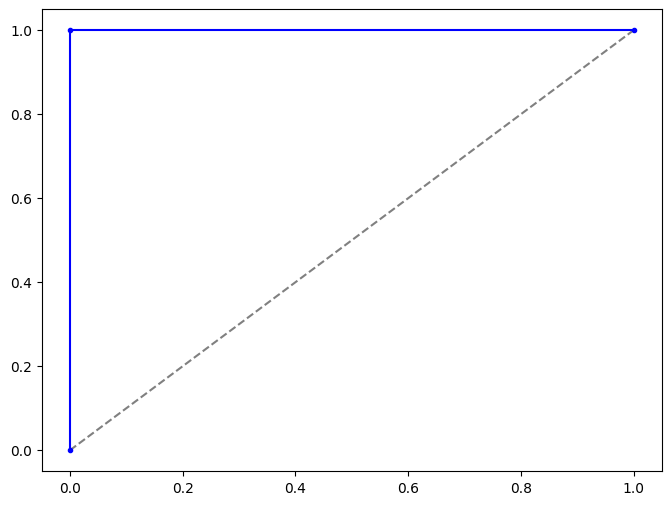

In [36]:
#predict probabilities
probs = dt_model.predict_proba(X_train)
probs = probs[:, 1]
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], linestyle='--',color='gray')
#plot ROC curve for the model
plt.plot(fpr, tpr, marker='.',color='blue')
plt.show()

AUC: 0.930


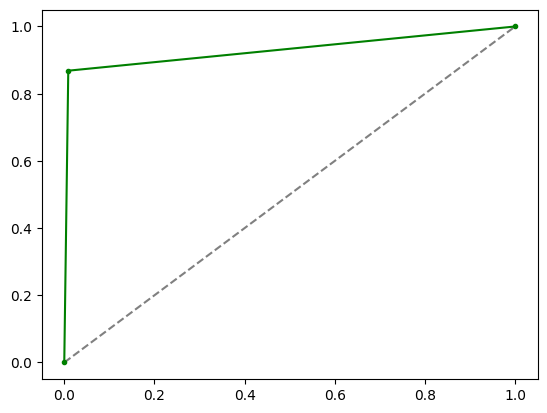

In [37]:
#predict probabilities
probs = dt_model.predict_proba(X_test)
probs = probs[:, 1]
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--',color='gray')
#plot ROC curve for the model
plt.plot(fpr, tpr, marker='.',color='green')
plt.show()

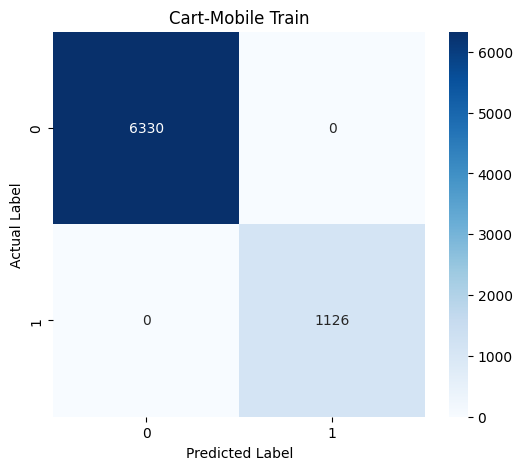

In [38]:
confusion_matrix(y_train, ytrain_predict)
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot = True,cbar = True,fmt = 'd',cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Cart-Mobile Train')
plt.show()

In [39]:
#Train Data Accuracy
dt_model.score(X_train,y_train) 

1.0

In [40]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6330
           1       1.00      1.00      1.00      1126

    accuracy                           1.00      7456
   macro avg       1.00      1.00      1.00      7456
weighted avg       1.00      1.00      1.00      7456



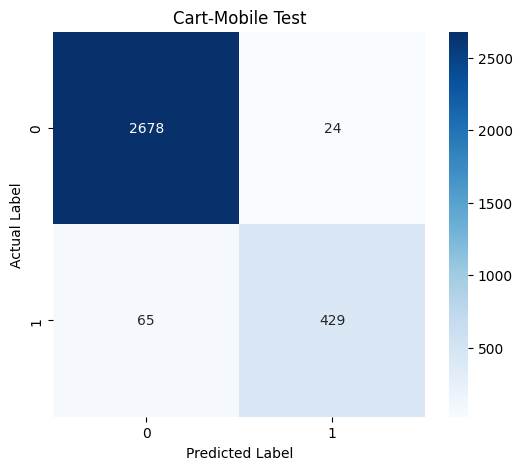

In [41]:
confusion_matrix(y_test, ytest_predict)
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test,ytest_predict),annot = True,cbar = True,fmt = 'd',cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Cart-Mobile Test')
plt.show()

In [42]:
#Test Data Accuracy
dt_model.score(X_test,y_test)

0.9721526908635795

In [43]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2702
           1       0.95      0.87      0.91       494

    accuracy                           0.97      3196
   macro avg       0.96      0.93      0.94      3196
weighted avg       0.97      0.97      0.97      3196



In [44]:
#Tuning
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 9,min_samples_leaf=10,min_samples_split=80)
reg_dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=10, min_samples_split=80)

In [45]:
ld_tree_regularized = open('ld_tree_regularized.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file= ld_tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))
ld_tree_regularized.close()
dot_data

In [46]:
print(pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                                                   Imp
total_likes_on_outofstation_checkin_received  0.277406
total_likes_on_outstation_checkin_given       0.149011
following_company_page                        0.118772
yearly_avg_Outstation_checkins                0.101597
Adult_flag                                    0.086304
Yearly_avg_view_on_travel_page                0.082663
week_since_last_outstation_checkin            0.069003
Daily_Avg_mins_spend_on_traveling_page        0.037595
member_in_family                              0.034334
travelling_network_rating                     0.022547
working_flag                                  0.010875
Yearly_avg_comment_on_travel_page             0.007059
montly_avg_comment_on_company_page            0.002833
preferred_device                              0.000000
preferred_location_type                       0.000000


In [47]:
ytrain_predict = reg_dt_model.predict(X_train)
ytest_predict = reg_dt_model.predict(X_test)
print('ytrain_predict',ytrain_predict.shape)
print('ytest_predict',ytest_predict.shape)

ytrain_predict (7456,)
ytest_predict (3196,)


In [48]:
ytest_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [49]:
ytest_predict_prob=reg_dt_model.predict_proba(X_test)
ytest_predict_prob

array([[1.        , 0.        ],
       [0.93644068, 0.06355932],
       [0.84864865, 0.15135135],
       ...,
       [0.99141631, 0.00858369],
       [0.72340426, 0.27659574],
       [0.84864865, 0.15135135]])

In [50]:
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,1.000000,0.000000
1,0.936441,0.063559
2,0.848649,0.151351
3,0.848649,0.151351
4,0.978903,0.021097


AUC: 0.919


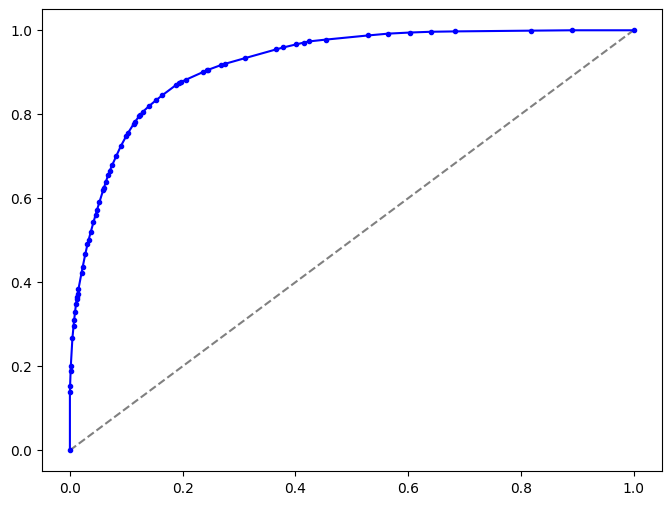

In [51]:
#predict probabilities
probs = reg_dt_model.predict_proba(X_train)
probs = probs[:, 1]
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.figure(figsize=(8,6)) 
plt.plot([0, 1], [0, 1], linestyle='--',color='gray')
#plot ROC curve for the model
plt.plot(fpr, tpr, marker='.',color='blue')
plt.show()

AUC: 0.888


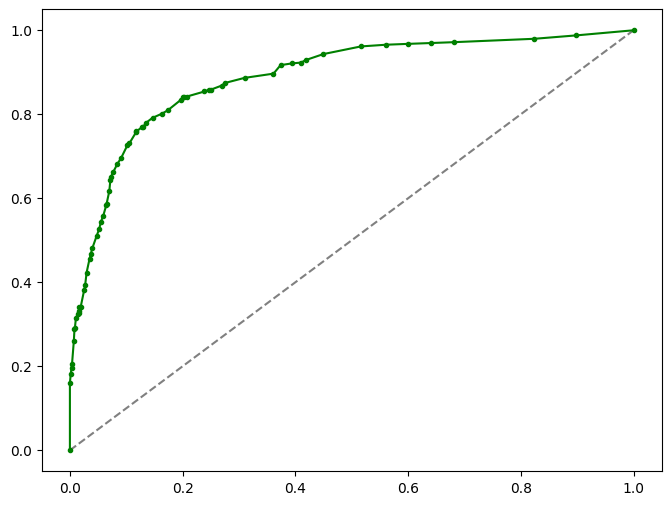

In [52]:
#predict probabilities
probs = reg_dt_model.predict_proba(X_test)
probs = probs[:, 1]
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], linestyle='--',color='gray')
#plot ROC curve for the model
plt.plot(fpr, tpr, marker='.',color='green')
plt.show()

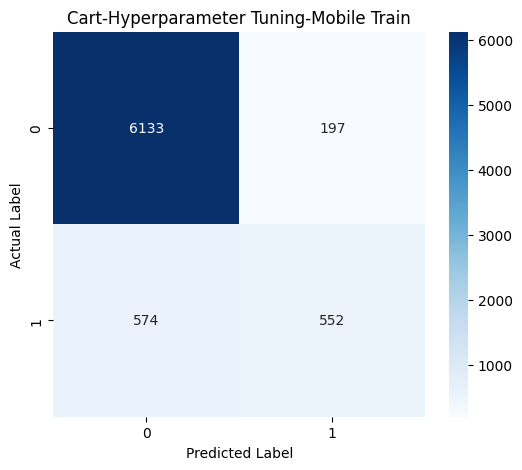

In [53]:
confusion_matrix(y_train, ytrain_predict)
plt.figure(figsize=(6,5)) 
sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot = True,cbar = True,fmt = 'd',cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Cart-Hyperparameter Tuning-Mobile Train')
plt.show()

In [54]:
#Train Data Accuracy
reg_dt_model.score(X_train,y_train)

0.896593347639485

In [55]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      6330
           1       0.74      0.49      0.59      1126

    accuracy                           0.90      7456
   macro avg       0.83      0.73      0.76      7456
weighted avg       0.89      0.90      0.89      7456



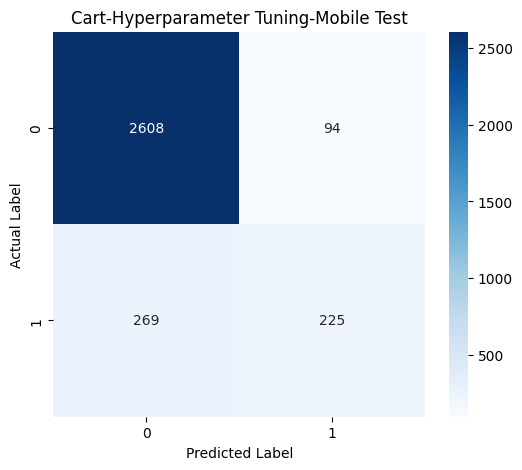

In [56]:
confusion_matrix(y_test, ytest_predict)
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test,ytest_predict),annot = True,cbar = True,fmt = 'd',cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Cart-Hyperparameter Tuning-Mobile Test')
plt.show()

In [57]:
#Test Data Accuracy
reg_dt_model.score(X_test,y_test)

0.8864205256570713

In [58]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.91      0.97      0.93      2702
           1       0.71      0.46      0.55       494

    accuracy                           0.89      3196
   macro avg       0.81      0.71      0.74      3196
weighted avg       0.88      0.89      0.88      3196



In [59]:
#SMOTE
sm = SMOTE()
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
#check the shape after SMOTE
X_train_res.shape

(12660, 15)

In [60]:
smote_cart_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 9,min_samples_leaf=10,min_samples_split=80)
smote_cart_model.fit(X_train_res, y_train_res)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=10, min_samples_split=80)

In [61]:
ytrain_predict = reg_dt_model.predict(X_train)
ytest_predict = reg_dt_model.predict(X_test)
print('ytrain_predict',ytrain_predict.shape)
print('ytest_predict',ytest_predict.shape)

ytrain_predict (7456,)
ytest_predict (3196,)


In [62]:
ytest_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [63]:
ytest_predict_prob=reg_dt_model.predict_proba(X_test)
ytest_predict_prob

array([[1.        , 0.        ],
       [0.93644068, 0.06355932],
       [0.84864865, 0.15135135],
       ...,
       [0.99141631, 0.00858369],
       [0.72340426, 0.27659574],
       [0.84864865, 0.15135135]])

In [64]:
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,1.000000,0.000000
1,0.936441,0.063559
2,0.848649,0.151351
3,0.848649,0.151351
4,0.978903,0.021097


AUC: 0.919


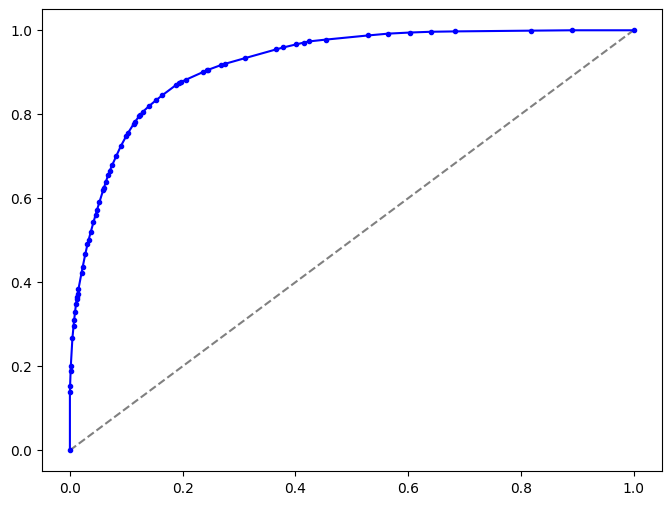

In [65]:
#predict probabilities
probs = reg_dt_model.predict_proba(X_train)
probs = probs[:, 1]
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], linestyle='--',color='gray')
#plot ROC curve for the model
plt.plot(fpr, tpr, marker='.',color='blue')
plt.show()

AUC: 0.888


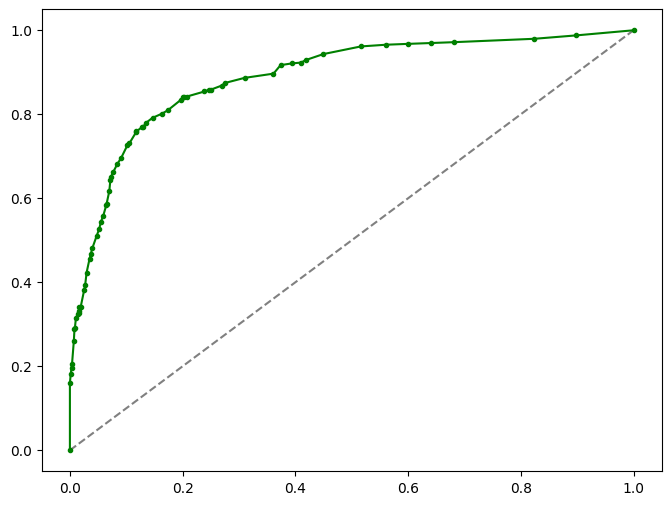

In [66]:
#predict probabilities
probs = reg_dt_model.predict_proba(X_test)
probs = probs[:, 1]
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], linestyle='--',color='gray')
#plot ROC curve for the model
plt.plot(fpr, tpr, marker='.',color='green')
plt.show()

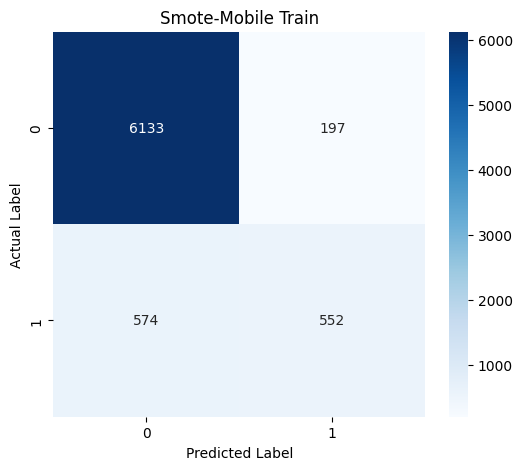

In [67]:
confusion_matrix(y_train, ytrain_predict)
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot = True,cbar = True,fmt = 'd',cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Smote-Mobile Train')
plt.show()

In [68]:
#Train Data Accuracy
reg_dt_model.score(X_train,y_train)

0.896593347639485

In [69]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      6330
           1       0.74      0.49      0.59      1126

    accuracy                           0.90      7456
   macro avg       0.83      0.73      0.76      7456
weighted avg       0.89      0.90      0.89      7456



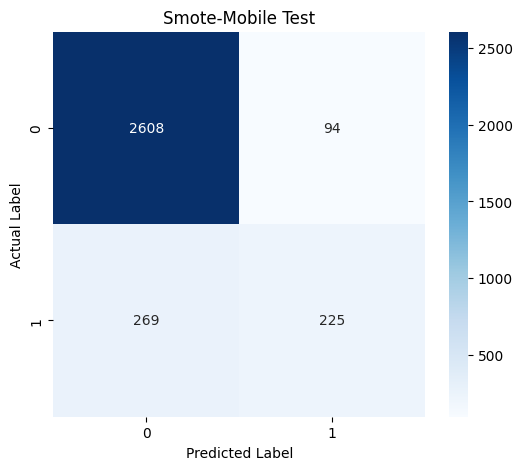

In [70]:
confusion_matrix(y_test, ytest_predict)
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, ytest_predict),annot = True,cbar = True,fmt = 'd',cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Smote-Mobile Test')
plt.show()

In [71]:
#Test Data Accuracy
reg_dt_model.score(X_test,y_test)

0.8864205256570713

In [72]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.91      0.97      0.93      2702
           1       0.71      0.46      0.55       494

    accuracy                           0.89      3196
   macro avg       0.81      0.71      0.74      3196
weighted avg       0.88      0.89      0.88      3196



In [73]:
#Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [74]:
log_train_predict = log_model.predict(X_train)
log_test_predict = log_model.predict(X_test)
log_model.score(X_train,y_train)

0.8489806866952789

In [75]:
log_model.score(X_test,y_test)

0.8454317897371715

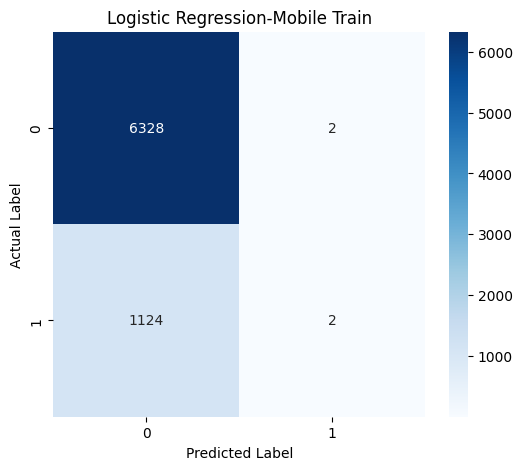

In [76]:
confusion_matrix(y_train,log_train_predict)
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_train,log_train_predict),annot = True,cbar = True,fmt = 'd',cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Logistic Regression-Mobile Train')
plt.show()

In [77]:
print(classification_report(y_train,log_train_predict)) 

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      6330
           1       0.50      0.00      0.00      1126

    accuracy                           0.85      7456
   macro avg       0.67      0.50      0.46      7456
weighted avg       0.80      0.85      0.78      7456



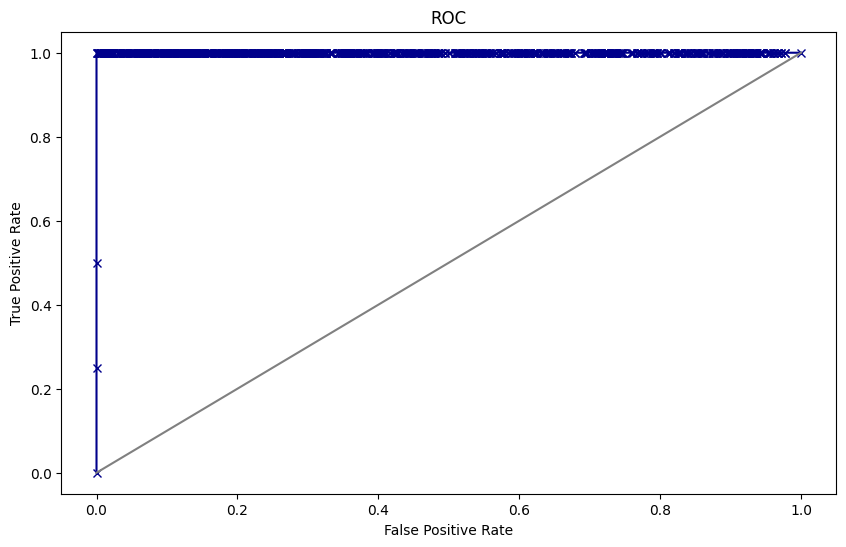

Area under Curve is 1.0


In [78]:
rf_fpr,rf_tpr,_ = roc_curve(log_train_predict,log_model.predict_proba(X_train)[:,1])
plt.figure(figsize=(10,6))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'logit',color='darkblue')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1),color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(log_train_predict,log_model.predict_proba(X_train)[:,1]))

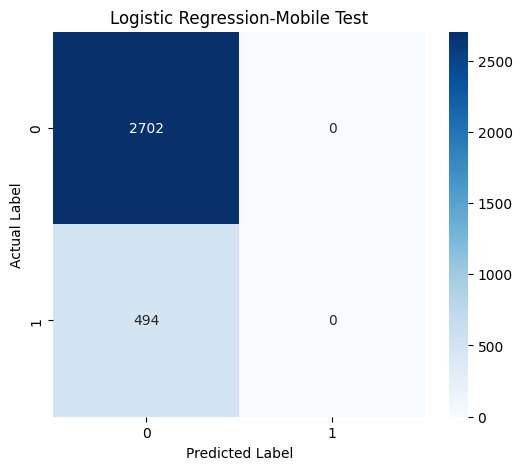

In [79]:
confusion_matrix(y_test,log_test_predict)
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test,log_test_predict),annot = True,cbar = True,fmt = 'd',cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Logistic Regression-Mobile Test')
plt.show()

In [80]:
print(classification_report(y_test,log_test_predict)) 

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2702
           1       0.00      0.00      0.00       494

    accuracy                           0.85      3196
   macro avg       0.42      0.50      0.46      3196
weighted avg       0.71      0.85      0.77      3196



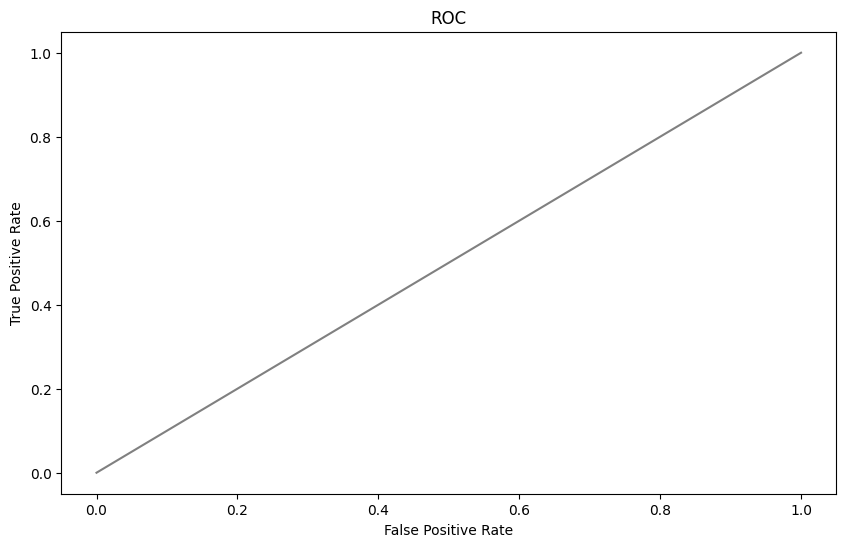

In [81]:
rf_fpr,rf_tpr,_ = roc_curve(log_test_predict,log_model.predict_proba(X_test)[:,1])
plt.figure(figsize=(10,6)) 
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'logit',color='darkgreen')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1),color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
try:
    print('Area under Curve is', roc_auc_score(log_test_predict,log_model.predict_proba(X_test)[:,1]))
except ValueError:
    pass

In [82]:
grid_log={'penalty':['none', 'l1', 'l2', 'elasticnet'], 'solver':['sag','lbfgs','newtoncg','lbfgs', 'liblinear', 'saga'], 'tol':[0.0001,0.00001]}
grid_search1 = GridSearchCV(estimator = log_model, param_grid = grid_log, cv = 3,n_jobs=-1,scoring='f1')
grid_search1.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                         'solver': ['sag', 'lbfgs', 'newtoncg', 'lbfgs',
                                    'liblinear', 'saga'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [83]:
print(grid_search1.best_params_,'\n')
print(grid_search1.best_estimator_)

{'penalty': 'l1', 'solver': 'liblinear', 'tol': 1e-05} 

LogisticRegression(penalty='l1', solver='liblinear', tol=1e-05)


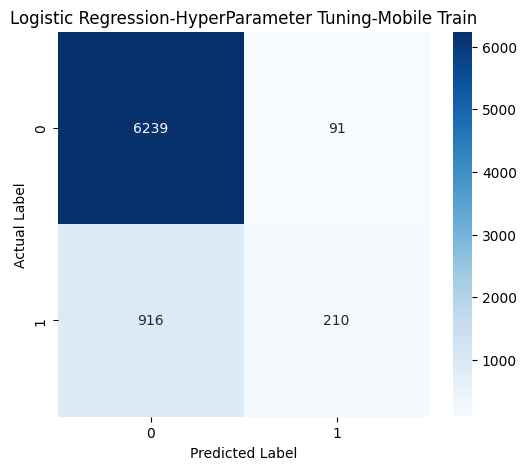

In [84]:
best_model1 = grid_search1.best_estimator_
log_train_predict = best_model1.predict(X_train)
log_test_predict = best_model1.predict(X_test)
#Confusion Matrix for Train set
confusion_matrix(y_train,log_train_predict)
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_train,log_train_predict),annot = True,cbar = True,fmt = 'd',cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Logistic Regression-HyperParameter Tuning-Mobile Train')
plt.show()

In [85]:
print(classification_report(y_train,log_train_predict)) 

              precision    recall  f1-score   support

           0       0.87      0.99      0.93      6330
           1       0.70      0.19      0.29      1126

    accuracy                           0.86      7456
   macro avg       0.78      0.59      0.61      7456
weighted avg       0.85      0.86      0.83      7456



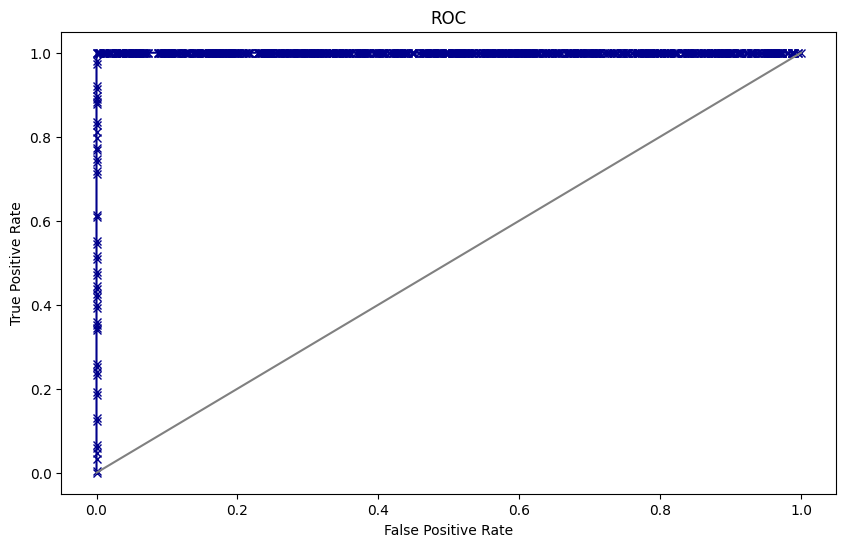

Area under Curve is 1.0


In [86]:
rf_fpr,rf_tpr,_ = roc_curve(log_train_predict,best_model1.predict_proba(X_train)[:,1])
plt.figure(figsize=(10,6))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'logit',color='darkblue')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1),color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(log_train_predict,best_model1.predict_proba(X_train)[:,1]))

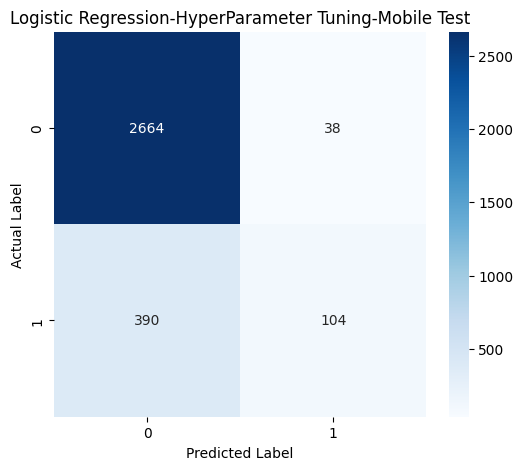

In [87]:
#Confusion Matrix for Test set
confusion_matrix(y_test,log_test_predict)
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test,log_test_predict),annot = True,cbar = True,fmt = 'd',cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Logistic Regression-HyperParameter Tuning-Mobile Test')
plt.show()

In [88]:
print(classification_report(y_test,log_test_predict)) 

              precision    recall  f1-score   support

           0       0.87      0.99      0.93      2702
           1       0.73      0.21      0.33       494

    accuracy                           0.87      3196
   macro avg       0.80      0.60      0.63      3196
weighted avg       0.85      0.87      0.83      3196



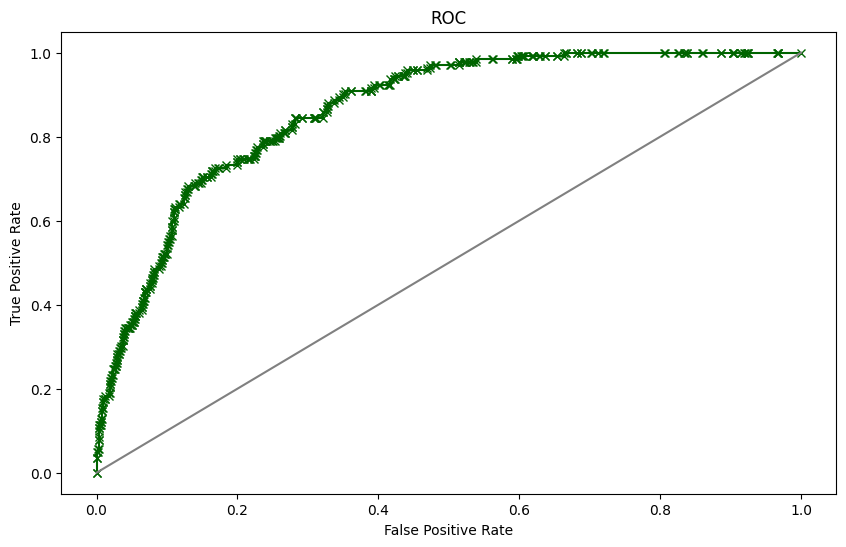

Area under Curve is 0.8635569145060277


In [89]:
rf_fpr,rf_tpr,_ = roc_curve(log_test_predict,log_model.predict_proba(X_test)[:,1])
plt.figure(figsize=(10,6))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'logit',color='darkgreen')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1),color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(log_test_predict,log_model.predict_proba(X_test)[:,1]))

Feature: 0, Score: -0.00374
Feature: 1, Score: 0.14529
Feature: 2, Score: -0.00001
Feature: 3, Score: 0.02914
Feature: 4, Score: 0.00955
Feature: 5, Score: 0.02609
Feature: 6, Score: -0.00142
Feature: 7, Score: -0.00009
Feature: 8, Score: 0.15434
Feature: 9, Score: 1.48880
Feature: 10, Score: -0.01160
Feature: 11, Score: 0.14085
Feature: 12, Score: -0.20002
Feature: 13, Score: -1.16036
Feature: 14, Score: -0.02807


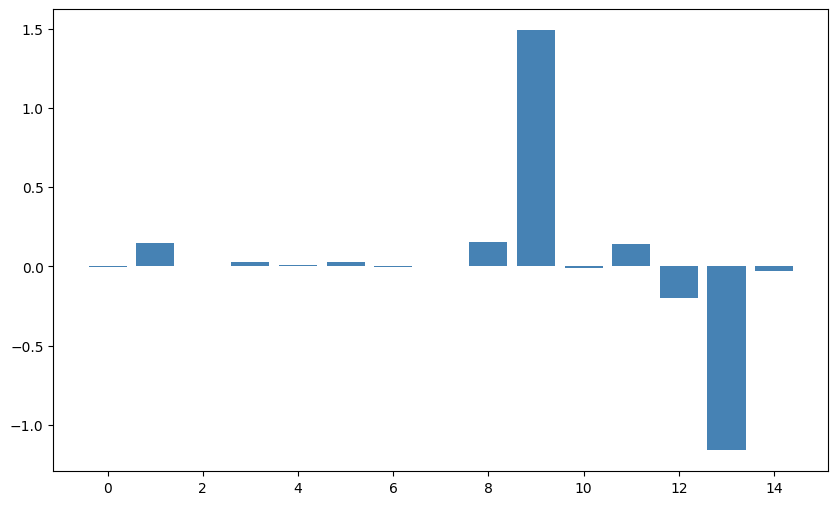

In [90]:
#get importance
importance = best_model1.coef_[0]
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
plt.figure(figsize=(10,6))
plt.bar([x for x in range(len(importance))], importance, color='steelblue') 
plt.show()

In [91]:
#Linear Discriminant Analysis
LDA = LinearDiscriminantAnalysis()
lda_model=LDA.fit(X_train, y_train)
lda_model

LinearDiscriminantAnalysis()

In [92]:
lda_train_predict = lda_model.predict(X_train)
lda_test_predict = lda_model.predict(X_test)
lda_model.score(X_train,y_train)

0.86306330472103

In [93]:
lda_model.score(X_test,y_test)

0.8613892365456821

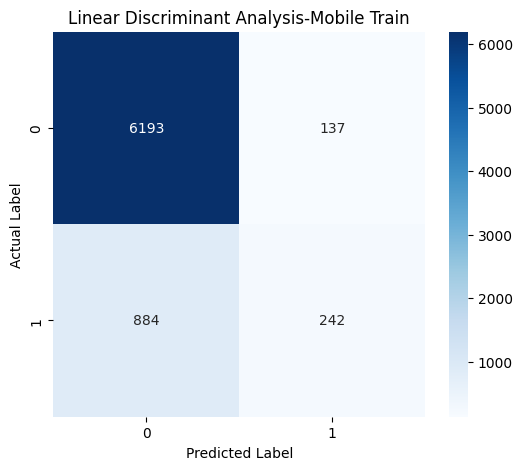

In [94]:
#Confusion Matrix for Train set
confusion_matrix(y_train,lda_train_predict)
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_train,lda_train_predict),annot = True,cbar = True,fmt = 'd',cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Linear Discriminant Analysis-Mobile Train')
plt.show()

In [95]:
print(classification_report(y_train,lda_train_predict)) 

              precision    recall  f1-score   support

           0       0.88      0.98      0.92      6330
           1       0.64      0.21      0.32      1126

    accuracy                           0.86      7456
   macro avg       0.76      0.60      0.62      7456
weighted avg       0.84      0.86      0.83      7456



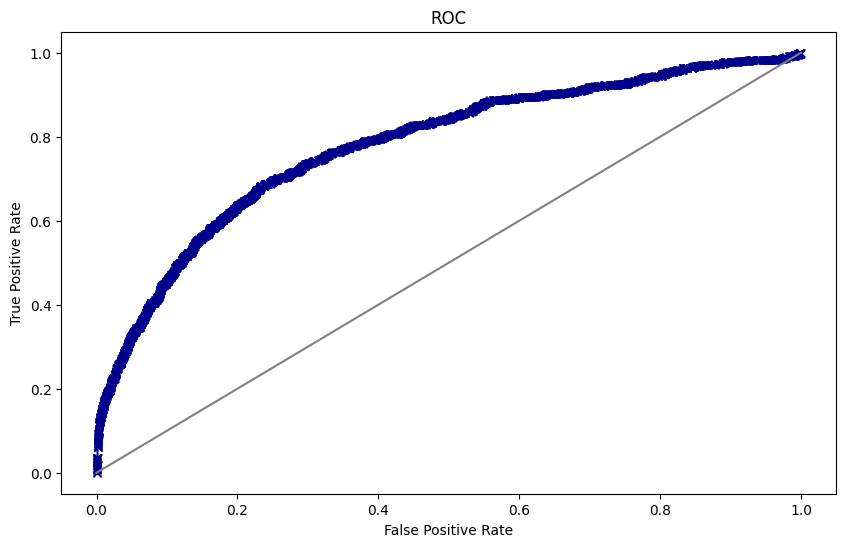

Area under Curve is 0.7791442537298774


In [96]:
rf_fpr,rf_tpr,_ = roc_curve(y_train,lda_model.predict_proba(X_train)[:,1])
plt.figure(figsize=(10,6))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'LDA',color='darkblue')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1),color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_train,lda_model.predict_proba(X_train)[:,1]))

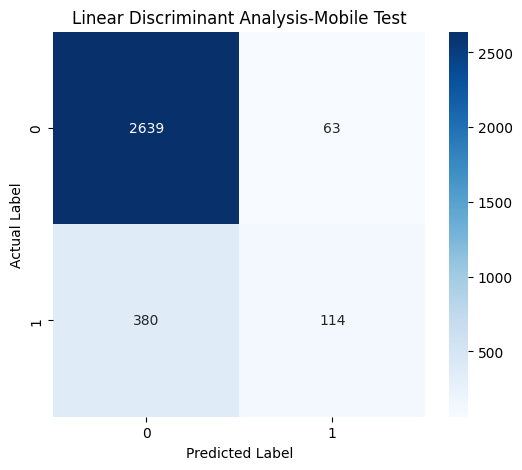

In [97]:
confusion_matrix(y_test,lda_test_predict)
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test,lda_test_predict),annot = True,cbar = True,fmt = 'd',cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Linear Discriminant Analysis-Mobile Test')
plt.show()

In [98]:
print(classification_report(y_test,lda_test_predict)) 

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2702
           1       0.64      0.23      0.34       494

    accuracy                           0.86      3196
   macro avg       0.76      0.60      0.63      3196
weighted avg       0.84      0.86      0.83      3196



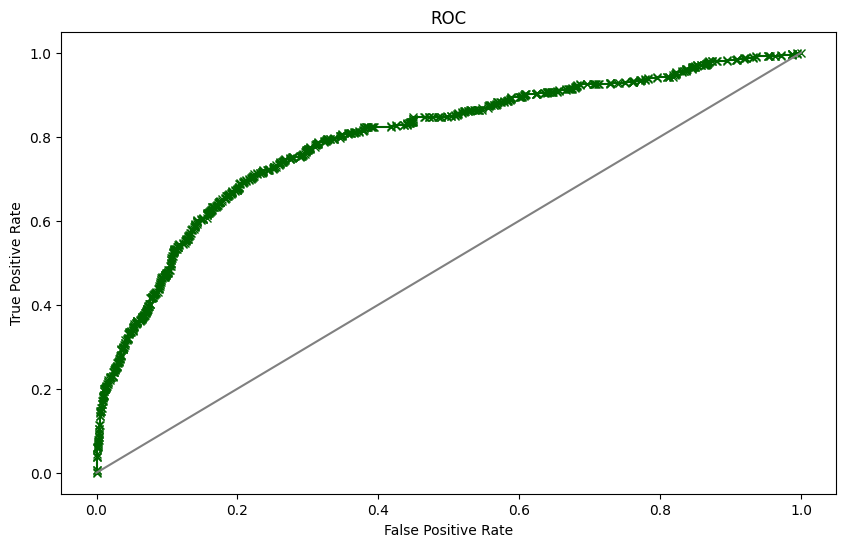

Area under Curve is 0.7949464634084215


In [99]:
rf_fpr,rf_tpr,_ = roc_curve(y_test,lda_model.predict_proba(X_test)[:,1])
plt.figure(figsize=(10,6))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'LDA',color='darkgreen')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1),color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_test,lda_model.predict_proba(X_test)[:,1]))

In [100]:
grid_lda={ 'solver':['svd', 'lsqr', 'eigen'], 'shrinkage':['auto', 'float','none'], 'tol':[0.001,0.0001,0.00001]}
grid_search2 = GridSearchCV(estimator = lda_model, param_grid = grid_lda, cv = 3,n_jobs=-1,scoring='f1')
grid_search2.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'shrinkage': ['auto', 'float', 'none'],
                         'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [0.001, 0.0001, 1e-05]},
             scoring='f1')

In [101]:
lda_model.score(X_test,y_test)

0.8613892365456821

In [102]:
print(grid_search2.best_params_,'\n')
print(grid_search2.best_estimator_)

{'shrinkage': 'auto', 'solver': 'lsqr', 'tol': 0.001} 

LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr', tol=0.001)


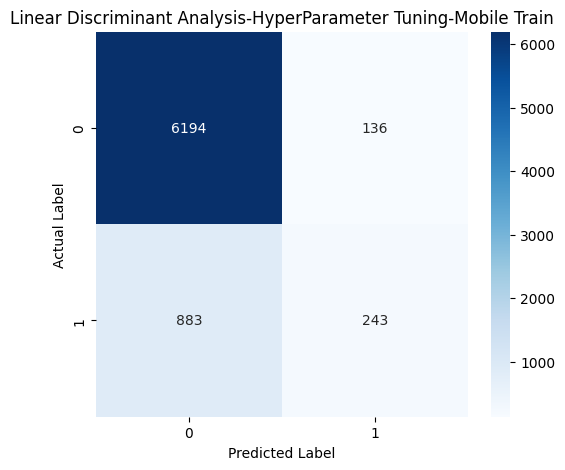

In [103]:
best_model2 = grid_search2.best_estimator_
lda_train_predict = best_model2.predict(X_train)
lda_test_predict = best_model2.predict(X_test)
#Confusion Matrix for Train set
confusion_matrix(y_train,lda_train_predict)
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_train,lda_train_predict),annot = True,cbar = True,fmt = 'd',cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Linear Discriminant Analysis-HyperParameter Tuning-Mobile Train')
plt.show()

In [104]:
print(classification_report(y_train,lda_train_predict)) 

              precision    recall  f1-score   support

           0       0.88      0.98      0.92      6330
           1       0.64      0.22      0.32      1126

    accuracy                           0.86      7456
   macro avg       0.76      0.60      0.62      7456
weighted avg       0.84      0.86      0.83      7456



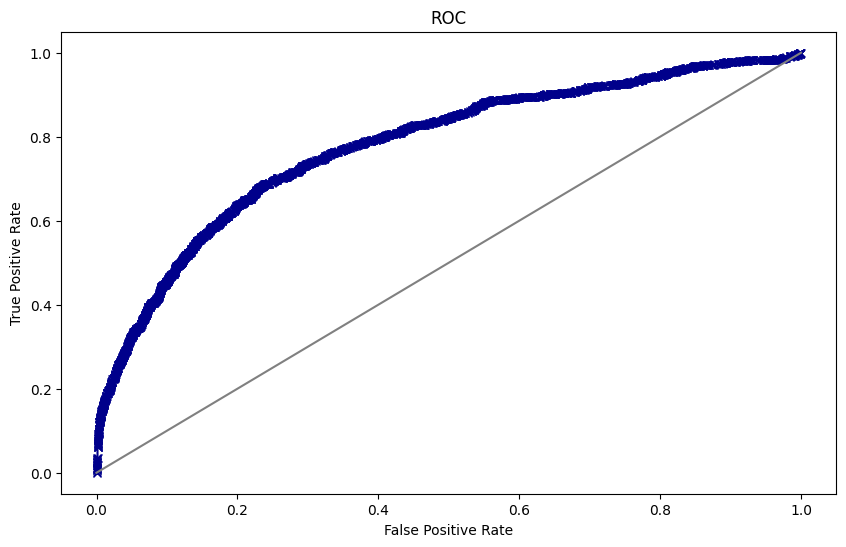

Area under Curve is 0.779175119746113


In [105]:
rf_fpr,rf_tpr,_ = roc_curve(y_train,best_model2.predict_proba(X_train)[:,1])
plt.figure(figsize=(10,6))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'LDA',color='darkblue')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1),color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_train,best_model2.predict_proba(X_train)[:,1]))

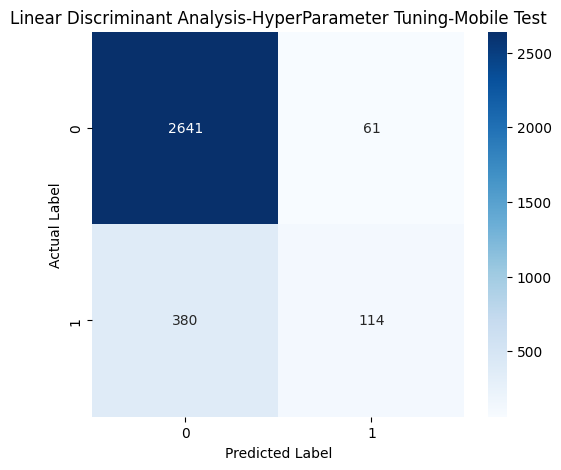

In [106]:
#Confusion Matrix for Test set
confusion_matrix(y_test,lda_test_predict)
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test,lda_test_predict),annot = True,cbar = True,fmt = 'd',cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Linear Discriminant Analysis-HyperParameter Tuning-Mobile Test')
plt.show()

In [107]:
print(classification_report(y_test,lda_test_predict)) 

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2702
           1       0.65      0.23      0.34       494

    accuracy                           0.86      3196
   macro avg       0.76      0.60      0.63      3196
weighted avg       0.84      0.86      0.83      3196



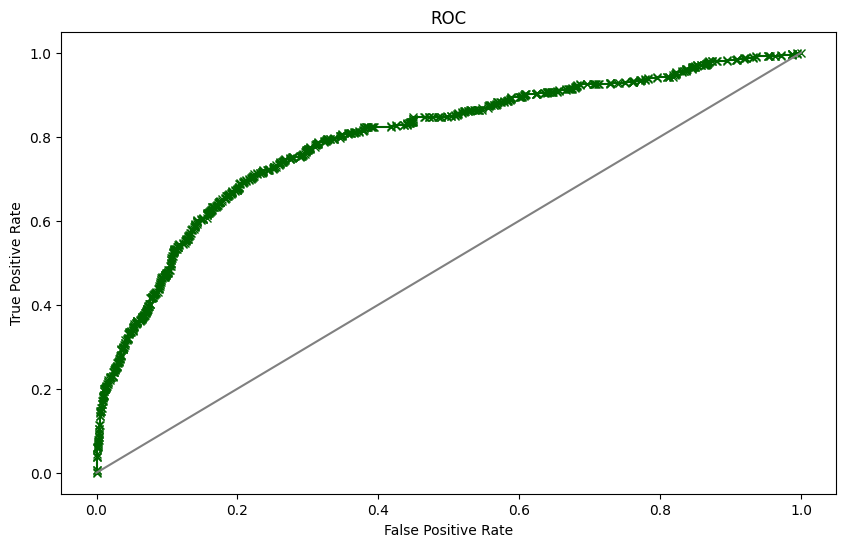

Area under Curve is 0.7949464634084215


In [108]:
rf_fpr,rf_tpr,_ = roc_curve(y_test,lda_model.predict_proba(X_test)[:,1])
plt.figure(figsize=(10,6)) 
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'LDA',color='darkgreen')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1),color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_test,lda_model.predict_proba(X_test)[:,1]))

Feature: 0, Score: -0.00427
Feature: 1, Score: -0.00000
Feature: 2, Score: -0.00001
Feature: 3, Score: 0.02780
Feature: 4, Score: -0.00373
Feature: 5, Score: 0.02471
Feature: 6, Score: -0.00100
Feature: 7, Score: -0.00006
Feature: 8, Score: 0.15506
Feature: 9, Score: 1.71181
Feature: 10, Score: -0.01273
Feature: 11, Score: 0.17538
Feature: 12, Score: -0.17577
Feature: 13, Score: -1.20644
Feature: 14, Score: -0.02304


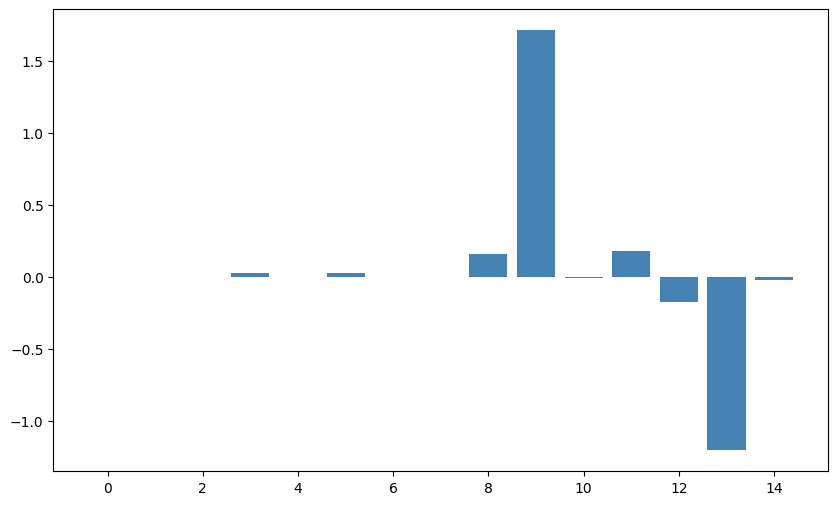

In [109]:
#get importance
importance = best_model2.coef_[0]
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
plt.figure(figsize=(10,6))
plt.bar([x for x in range(len(importance))], importance, color='steelblue')
plt.show()

In [110]:
#Random Forest
RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model=RF_model.fit(X_train, y_train)
RF_train_predict = RF_model.predict(X_train)
model_score = RF_model.score(X_train, y_train)
print(model_score)

1.0


In [111]:
RF_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)

0.977784730913642


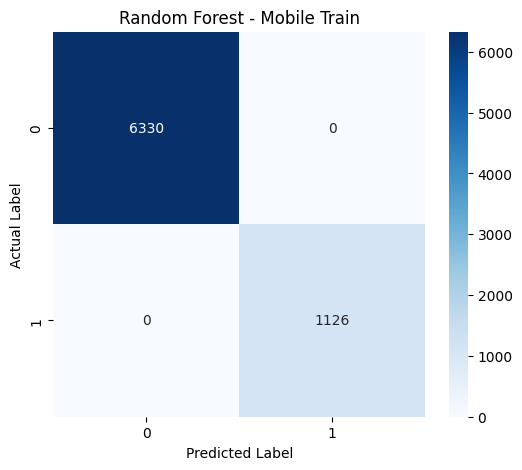

In [112]:
#Confusion Matrix for Train set
confusion_matrix(y_train,RF_train_predict)
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_train,RF_train_predict),annot = True,cbar = True,fmt = 'd',cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Random Forest - Mobile Train')
plt.show()

In [113]:
print(classification_report(y_train,RF_train_predict)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6330
           1       1.00      1.00      1.00      1126

    accuracy                           1.00      7456
   macro avg       1.00      1.00      1.00      7456
weighted avg       1.00      1.00      1.00      7456



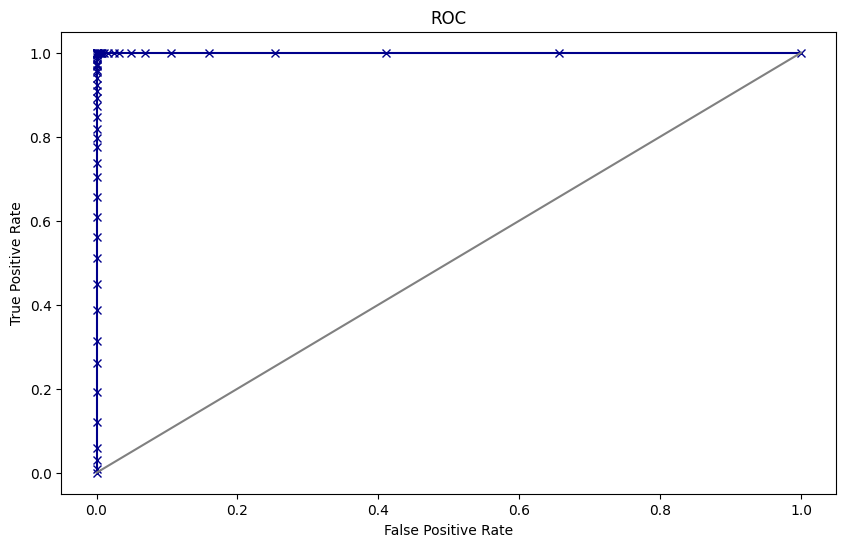

Area under Curve is 1.0


In [114]:
rf_fpr,rf_tpr,_ = roc_curve(y_train,RF_model.predict_proba(X_train)[:,1])
plt.figure(figsize=(10,6))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'RF',color='darkblue')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1),color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_train,RF_model.predict_proba(X_train)[:,1]))

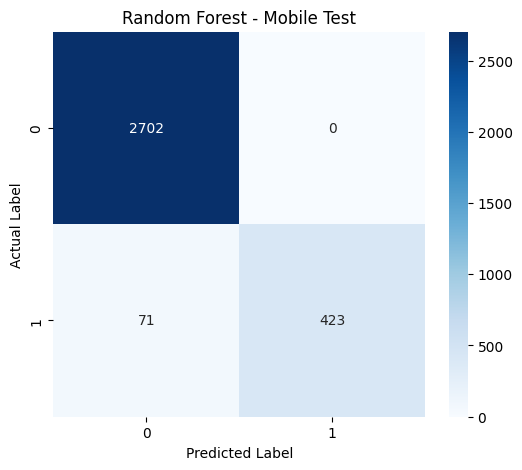

In [115]:
#Confusion Matrix for Test set
confusion_matrix(y_test,RF_test_predict)
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test,RF_test_predict),annot = True,cbar = True,fmt = 'd',cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Random Forest - Mobile Test')
plt.show()

In [116]:
print(classification_report(y_test,RF_test_predict)) 

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      2702
           1       1.00      0.86      0.92       494

    accuracy                           0.98      3196
   macro avg       0.99      0.93      0.95      3196
weighted avg       0.98      0.98      0.98      3196



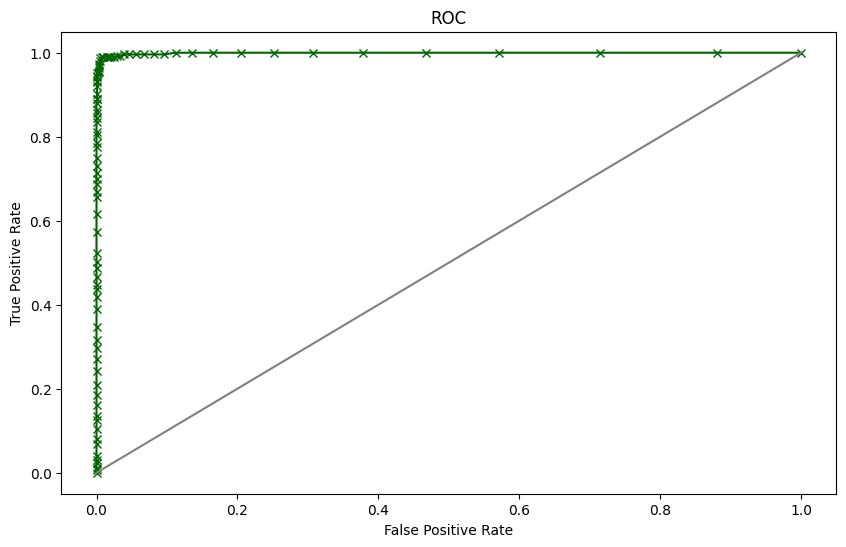

Area under Curve is 0.9991695310416335


In [117]:
rf_fpr,rf_tpr,_ = roc_curve(y_test,RF_model.predict_proba(X_test)[:,1])
plt.figure(figsize=(10,6))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'RF',color='darkgreen')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1),color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_test,RF_model.predict_proba(X_test)[:,1]))

In [118]:
RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model=RF_model.fit(X_train, y_train)
RF_train_predict = RF_model.predict(X_train)
model_score = RF_model.score(X_train, y_train)
print(model_score)

1.0


In [119]:
RF_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)

0.977784730913642


In [120]:
#RF using grid search
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100,200,300 ]}

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200, 300]}

In [121]:
param_grid={
    'max_depth':[7,8,9,10],
    'max_features':[3,4,5],
    'min_samples_leaf':[50,100],
    'min_samples_split':[150,300],
    'n_estimators':[100,200,300]
}
rfcl =RandomForestClassifier()
grid_search= GridSearchCV(estimator=rfcl,param_grid=param_grid,cv=3)

In [122]:
#Use the random grid to search for best hyperparameters
rf = RandomForestClassifier()
#Random search of parameters,using 3 fold cross validation and search across 100 different combinations and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [123]:
rf_random.best_params_

{'n_estimators': 1800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20,
 'bootstrap': False}

In [124]:
best_grid = rf_random.best_estimator_
best_grid

RandomForestClassifier(bootstrap=False, max_depth=20, max_features='auto',
                       n_estimators=1800)

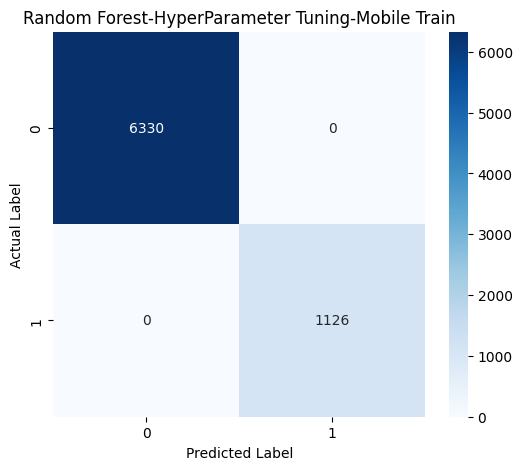

In [125]:
RF_train_predict = best_grid.predict(X_train)
RF_test_predict = best_grid.predict(X_test)
confusion_matrix(y_train,RF_train_predict)
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_train,RF_train_predict),annot = True,cbar = True,fmt = 'd',cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Random Forest-HyperParameter Tuning-Mobile Train')
plt.show()

In [126]:
print(classification_report(y_train,RF_train_predict)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6330
           1       1.00      1.00      1.00      1126

    accuracy                           1.00      7456
   macro avg       1.00      1.00      1.00      7456
weighted avg       1.00      1.00      1.00      7456



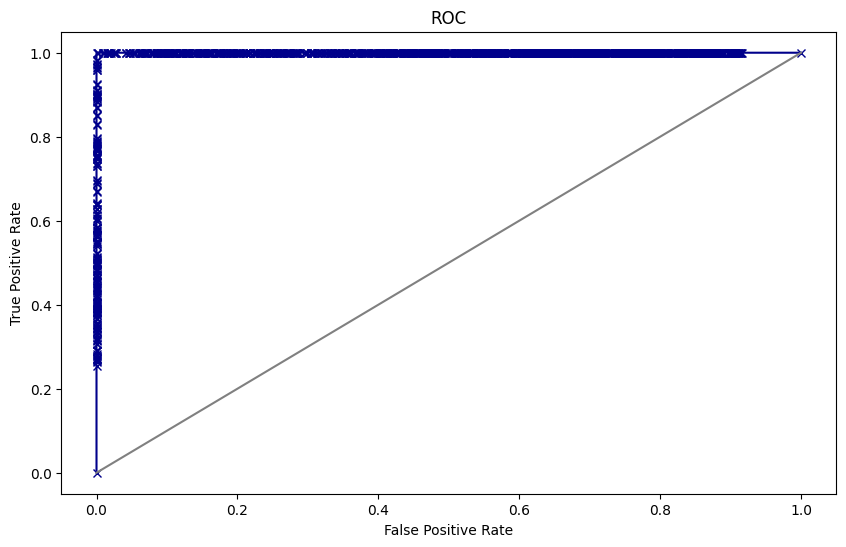

Area under Curve is 1.0


In [127]:
rf_fpr,rf_tpr,_ = roc_curve(y_train,best_grid.predict_proba(X_train)[:,1])
plt.figure(figsize=(10,6))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'RF',color='darkblue')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1),color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_train,best_grid.predict_proba(X_train)[:,1]))

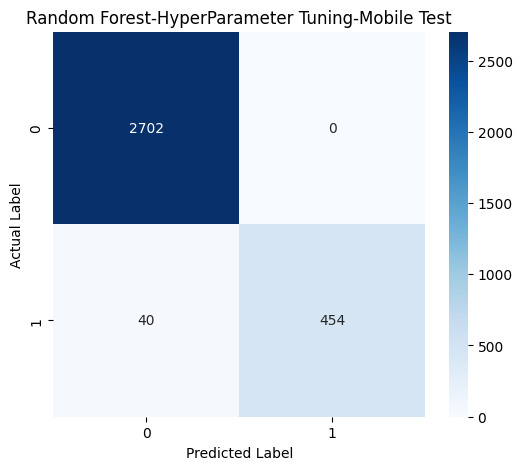

In [128]:
confusion_matrix(y_test,RF_test_predict)
plt.figure(figsize=(6,5)) 
sns.heatmap(confusion_matrix(y_test,RF_test_predict),annot = True,cbar = True,fmt = 'd',cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Random Forest-HyperParameter Tuning-Mobile Test')
plt.show()

In [129]:
print(classification_report(y_test,RF_test_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2702
           1       1.00      0.92      0.96       494

    accuracy                           0.99      3196
   macro avg       0.99      0.96      0.98      3196
weighted avg       0.99      0.99      0.99      3196



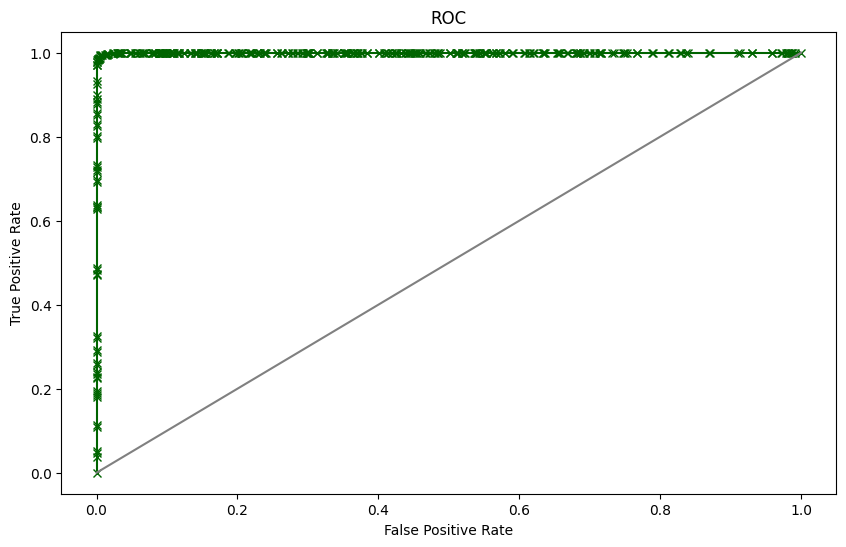

Area under Curve is 0.9998216945312665


In [130]:
rf_fpr,rf_tpr,_ = roc_curve(y_test,best_grid.predict_proba(X_test)[:,1])
plt.figure(figsize=(10,6))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'RF',color='darkgreen')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1),color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_test,best_grid.predict_proba(X_test)[:,1]))

Feature: 0, Score: 0.11915
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.14042
Feature: 3, Score: 0.07733
Feature: 4, Score: 0.04922
Feature: 5, Score: 0.04487
Feature: 6, Score: 0.07028
Feature: 7, Score: 0.16562
Feature: 8, Score: 0.06144
Feature: 9, Score: 0.06429
Feature: 10, Score: 0.03478
Feature: 11, Score: 0.01448
Feature: 12, Score: 0.04766
Feature: 13, Score: 0.04061
Feature: 14, Score: 0.06984


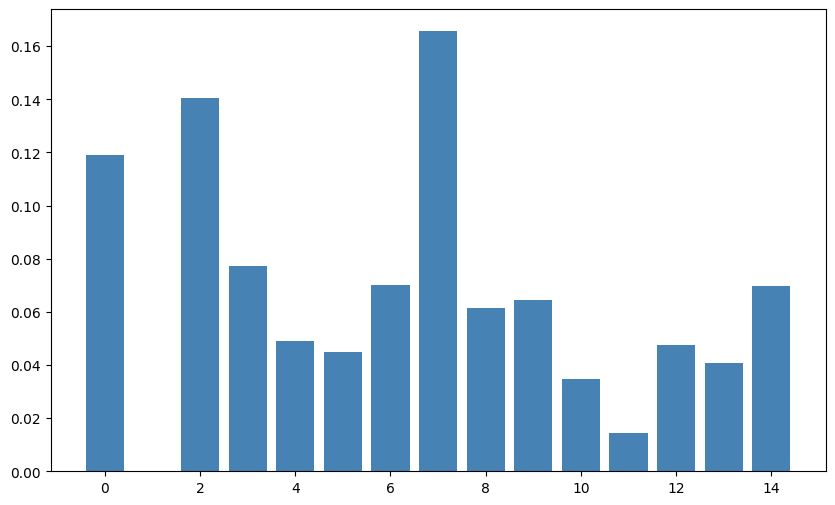

In [131]:
#get importance
importance = best_grid.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
plt.figure(figsize=(10,6))
plt.bar([x for x in range(len(importance))], importance, color='steelblue')
plt.show()

In [132]:
#KNN
ac_scores = []
for k in range(1,20,2):
    KNN = KNeighborsClassifier(n_neighbors=k)
    KNN.fit(X_train, y_train)
    scores = KNN.score(X_test, y_test)
    ac_scores.append(scores)
MCE = [1-x for x in ac_scores]
acc = [x for x in ac_scores]
acc

[0.9931163954943679,
 0.9784105131414268,
 0.9652690863579474,
 0.9389862327909887,
 0.9102002503128911,
 0.8811013767209012,
 0.8670212765957447,
 0.8692115143929913,
 0.8676470588235294,
 0.8601376720901126]

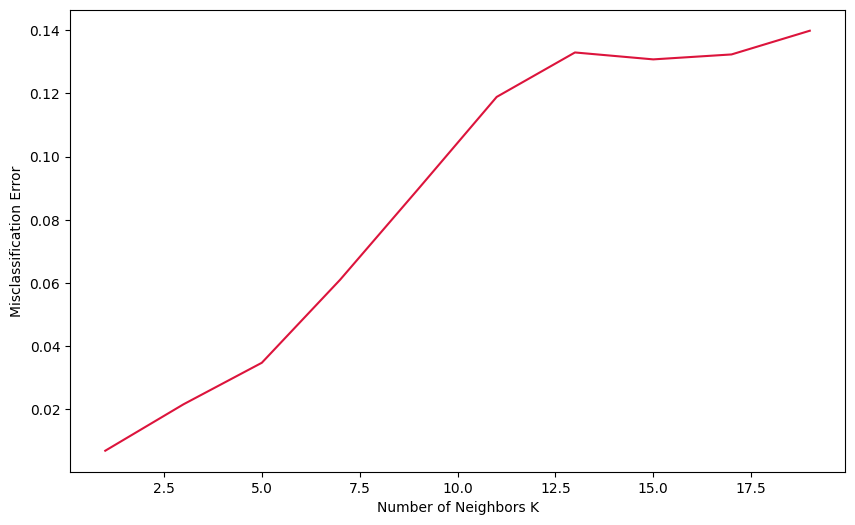

In [133]:
#plot misclassification error vs k
plt.figure(figsize=(10,6)) 
plt.plot(range(1,20,2),MCE,color='crimson')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [134]:
#KNN model with k=3 is optimum from scree plot
KNN_model=KNeighborsClassifier(n_neighbors=3)
KNN_model.fit(X_train,y_train)
KNN_train_predict = KNN_model.predict(X_train)
KNN_test_predict = KNN_model.predict(X_test)
KNN_model.score(X_train,y_train)

0.9942328326180258

In [135]:
KNN_model.score(X_test,y_test)

0.9784105131414268

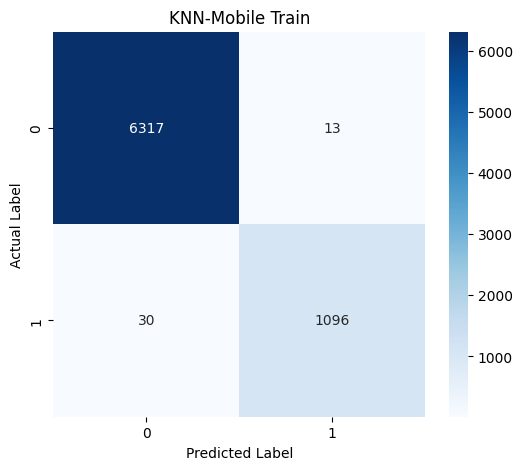

In [136]:
confusion_matrix(y_train,KNN_train_predict)
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_train,KNN_train_predict),annot = True,cbar = True,fmt = 'd',cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('KNN-Mobile Train')
plt.show()

In [137]:
print(classification_report(y_train,KNN_train_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6330
           1       0.99      0.97      0.98      1126

    accuracy                           0.99      7456
   macro avg       0.99      0.99      0.99      7456
weighted avg       0.99      0.99      0.99      7456



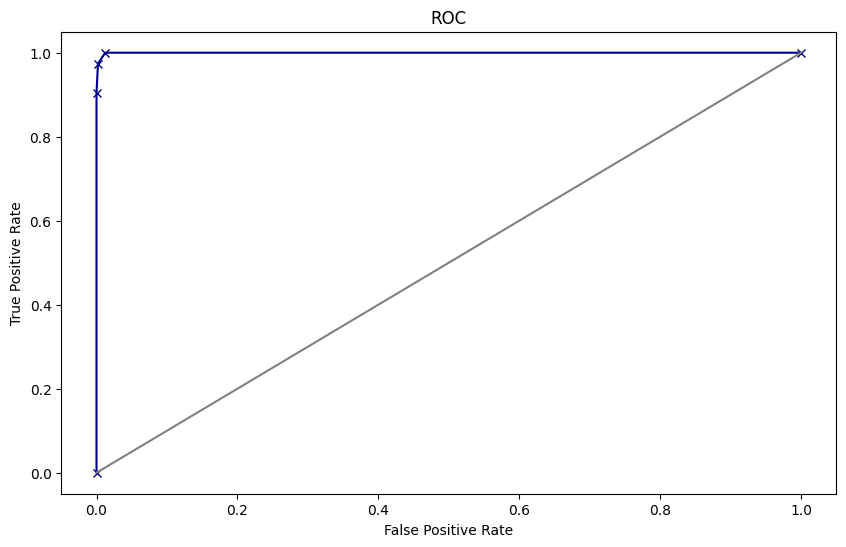

Area under Curve is 0.9997373582618504


In [138]:
rf_fpr,rf_tpr,_ = roc_curve(y_train,KNN_model.predict_proba(X_train)[:,1])
plt.figure(figsize=(10,6))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'RF',color='darkblue')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1),color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_train,KNN_model.predict_proba(X_train)[:,1]))

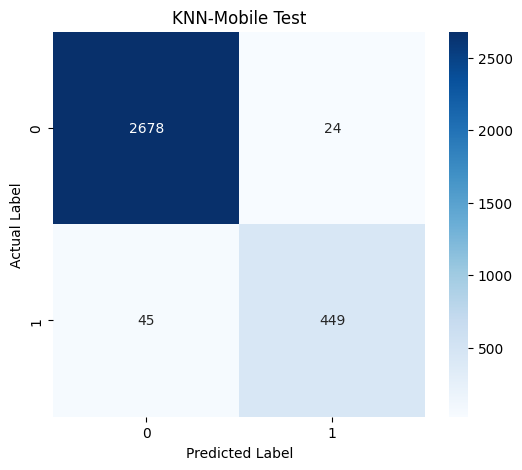

In [139]:
confusion_matrix(y_test,KNN_test_predict)
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test,KNN_test_predict),annot = True,cbar = True,fmt = 'd',cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('KNN-Mobile Test')
plt.show()

In [140]:
print(classification_report(y_test,KNN_test_predict)) 

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2702
           1       0.95      0.91      0.93       494

    accuracy                           0.98      3196
   macro avg       0.97      0.95      0.96      3196
weighted avg       0.98      0.98      0.98      3196



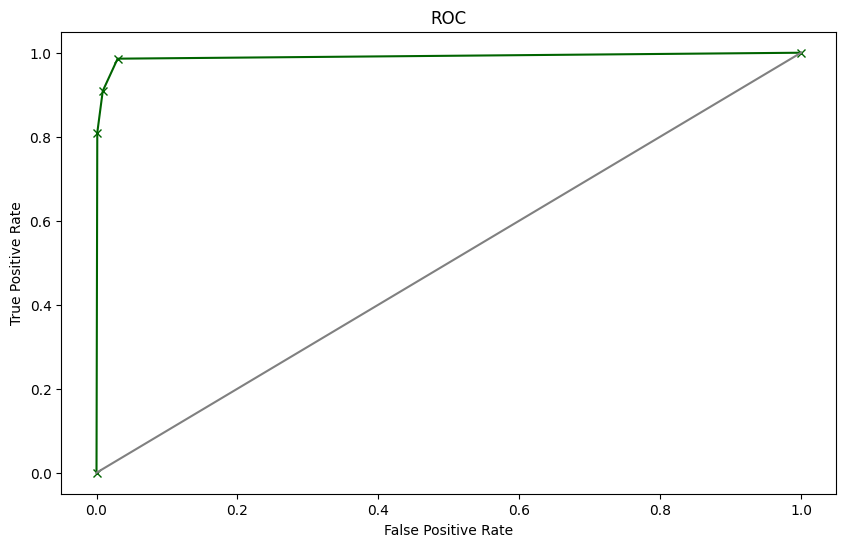

Area under Curve is 0.990262873205333


In [141]:
rf_fpr,rf_tpr,_ = roc_curve(y_test,KNN_model.predict_proba(X_test)[:,1])
plt.figure(figsize=(10,6))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'RF',color='darkgreen')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1),color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_test,KNN_model.predict_proba(X_test)[:,1]))

In [142]:
#Naive Bayes for Mobile dataset
NB_model=GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [143]:
y_train_predict=NB_model.predict(X_train)
NB_model=NB_model.score(X_train,y_train)
print(NB_model)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.8599785407725322
[[6249   81]
 [ 963  163]]
              precision    recall  f1-score   support

           0       0.87      0.99      0.92      6330
           1       0.67      0.14      0.24      1126

    accuracy                           0.86      7456
   macro avg       0.77      0.57      0.58      7456
weighted avg       0.84      0.86      0.82      7456



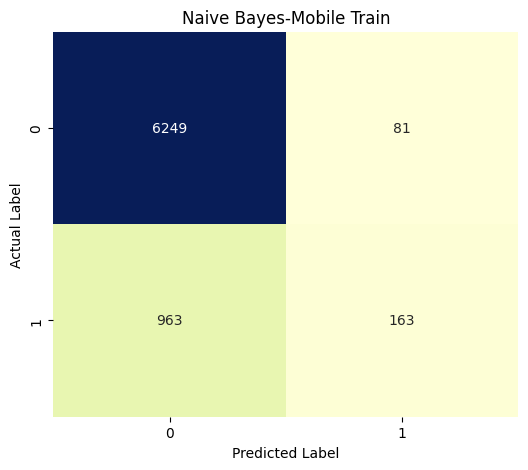

In [144]:
confusion_matrix(y_train,y_train_predict)
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_train,y_train_predict),annot=True, fmt='d',cbar=False, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Naive Bayes-Mobile Train')
plt.show()

In [145]:
NB_model=GaussianNB()
NB_model.fit(X_test, y_test)

GaussianNB()

In [146]:
y_test_predict=NB_model.predict(X_test)
model_score=NB_model.score(X_test, y_test)
print(model_score)

0.8620150187734669


In [147]:
y_test_predict=NB_model.predict(X_test)
NB_model=NB_model.score(X_test,y_test)
print(NB_model)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict)) 

0.8620150187734669
[[2639   63]
 [ 378  116]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2702
           1       0.65      0.23      0.34       494

    accuracy                           0.86      3196
   macro avg       0.76      0.61      0.63      3196
weighted avg       0.84      0.86      0.83      3196



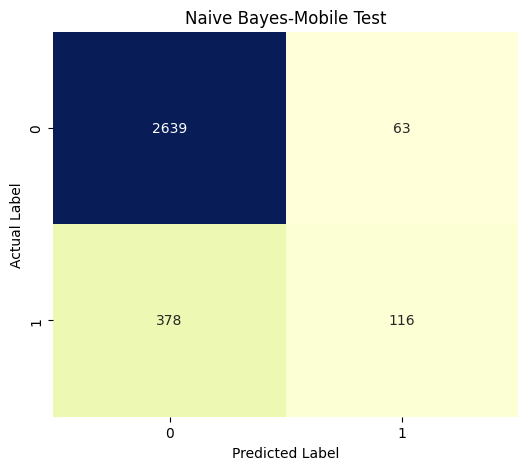

In [148]:
confusion_matrix(y_test,y_test_predict)
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test,y_test_predict),annot=True, fmt='d',cbar=False, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Naive Bayes-Mobile Test')
plt.show()

In [149]:
#Ensemble techniques
#Bagging using hyperparameters for mobile dataset
bc = BaggingClassifier(base_estimator=rf, oob_score=True, random_state=1)
params = {'n_estimators': [40, 42], 'base_estimator__max_leaf_nodes':[10, 15], 'base_estimator__max_depth':[4, 5, 6]}
bc_grid = GridSearchCV(estimator=bc, param_grid=params, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
bc_grid.fit(X_train, y_train)
best_params = bc_grid.best_params_
print(best_params)

{'base_estimator__max_depth': 6, 'base_estimator__max_leaf_nodes': 15, 'n_estimators': 42}


In [150]:
rf = RandomForestClassifier(max_leaf_nodes=15, max_depth=6)                   
bc = BaggingClassifier(base_estimator=rf, n_estimators=40, random_state=1, oob_score=True)
bc.fit(X_train, y_train)
final_preds = bc.predict(X_test)
y_train_predict=bc.predict(X_train)
model_score=bc.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.8615879828326181
[[6323    7]
 [1025  101]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      6330
           1       0.94      0.09      0.16      1126

    accuracy                           0.86      7456
   macro avg       0.90      0.54      0.54      7456
weighted avg       0.87      0.86      0.81      7456



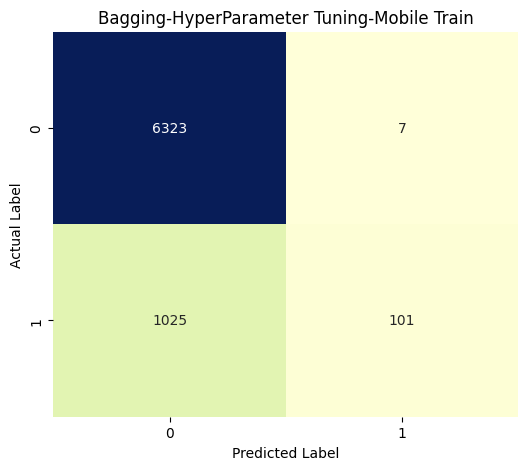

In [151]:
confusion_matrix(y_train,y_train_predict)
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_train,y_train_predict),annot=True, fmt='d',cbar=False, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Bagging-HyperParameter Tuning-Mobile Train')
plt.show()

In [152]:
y_test_predict=bc.predict(X_test)
model_score=bc.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))  

0.860450563204005
[[2698    4]
 [ 442   52]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      2702
           1       0.93      0.11      0.19       494

    accuracy                           0.86      3196
   macro avg       0.89      0.55      0.56      3196
weighted avg       0.87      0.86      0.81      3196



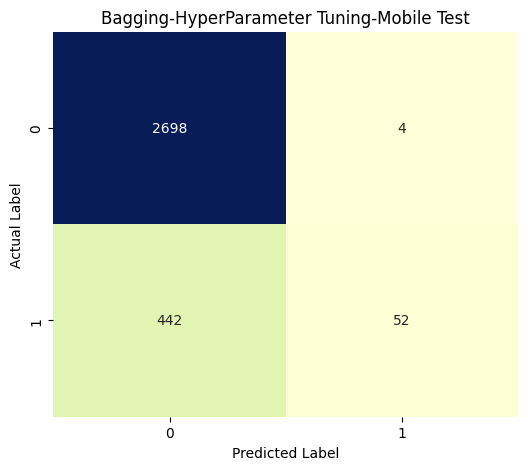

In [153]:
confusion_matrix(y_test,y_test_predict)
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test,y_test_predict),annot=True, fmt='d',cbar=False, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Bagging-HyperParameter Tuning-Mobile Test')
plt.show()

In [154]:
#Bagging without grid search Mobile dataset
rf=RandomForestClassifier()
Bagging_model=BaggingClassifier()
Bagging_model.fit(X_train,y_train)

BaggingClassifier()

In [155]:
y_train_predict=Bagging_model.predict(X_train)
Bagging_model_score=Bagging_model.score(X_train,y_train)
print(Bagging_model_score)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict)) 

0.9981223175965666
[[6329    1]
 [  13 1113]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6330
           1       1.00      0.99      0.99      1126

    accuracy                           1.00      7456
   macro avg       1.00      0.99      1.00      7456
weighted avg       1.00      1.00      1.00      7456



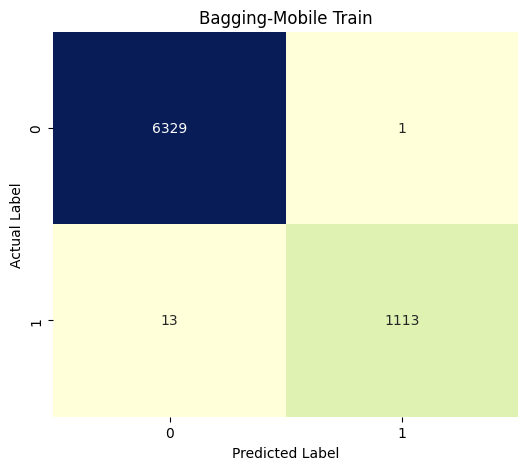

In [156]:
confusion_matrix(y_train,y_train_predict)
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_train,y_train_predict),annot=True, fmt='d',cbar=False, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Bagging-Mobile Train')
plt.show()

In [157]:
y_test_predict=Bagging_model.predict(X_test)
Bagging_model_score=Bagging_model.score(X_test,y_test)
print(Bagging_model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict)) 

0.9774718397997497
[[2697    5]
 [  67  427]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2702
           1       0.99      0.86      0.92       494

    accuracy                           0.98      3196
   macro avg       0.98      0.93      0.95      3196
weighted avg       0.98      0.98      0.98      3196



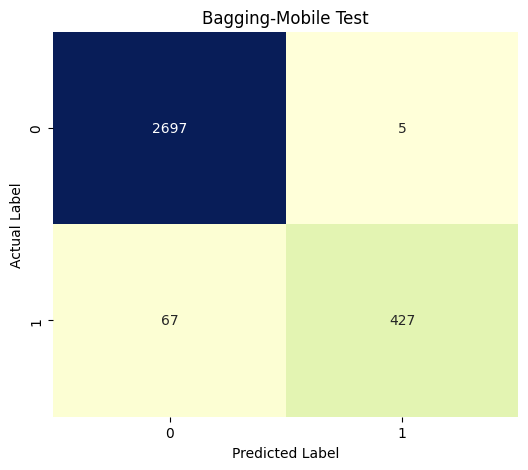

In [158]:
confusion_matrix(y_test,y_test_predict)
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test,y_test_predict),annot=True, fmt='d',cbar=False, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Bagging-Mobile Test')
plt.show()

In [159]:
#ADA Boosting Model for mobile
ADB_model=AdaBoostClassifier()
ADB_model.fit(X_train,y_train)

AdaBoostClassifier()

In [160]:
y_train_predict=ADB_model.predict(X_train)
ADB_model_score=ADB_model.score(X_train,y_train)
print(ADB_model_score)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))  

0.8739270386266095
[[6190  140]
 [ 800  326]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      6330
           1       0.70      0.29      0.41      1126

    accuracy                           0.87      7456
   macro avg       0.79      0.63      0.67      7456
weighted avg       0.86      0.87      0.85      7456



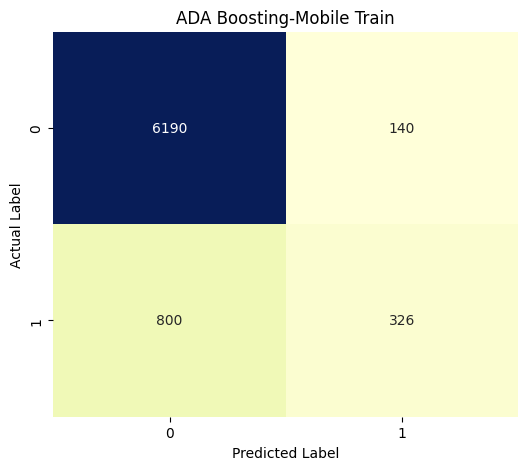

In [161]:
confusion_matrix(y_train,y_train_predict)
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_train,y_train_predict),annot=True, fmt='d',cbar=False, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('ADA Boosting-Mobile Train')
plt.show()

In [162]:
y_test_predict = ADB_model.predict(X_test)
ADB_model_score = ADB_model.score(X_test, y_test)
print(ADB_model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

0.8695244055068836
[[2629   73]
 [ 344  150]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.93      2702
           1       0.67      0.30      0.42       494

    accuracy                           0.87      3196
   macro avg       0.78      0.64      0.67      3196
weighted avg       0.85      0.87      0.85      3196



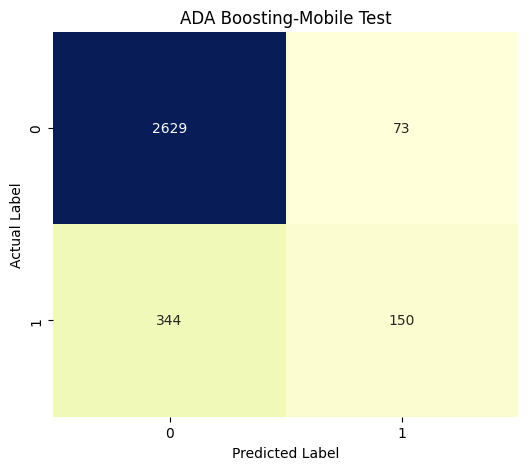

In [163]:
confusion_matrix(y_test,y_test_predict)
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test,y_test_predict),annot=True, fmt='d',cbar=False, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('ADA Boosting-Mobile Test')
plt.show()

In [164]:
#Gradient Boosting for Mobile
gbc_model=GradientBoostingClassifier()
gbc_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [165]:
y_train_predict = gbc_model.predict(X_train)
gbc_model_score = gbc_model.score(X_train, y_train)
print(gbc_model_score)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict)) 

0.910675965665236
[[6280   50]
 [ 616  510]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      6330
           1       0.91      0.45      0.60      1126

    accuracy                           0.91      7456
   macro avg       0.91      0.72      0.78      7456
weighted avg       0.91      0.91      0.90      7456



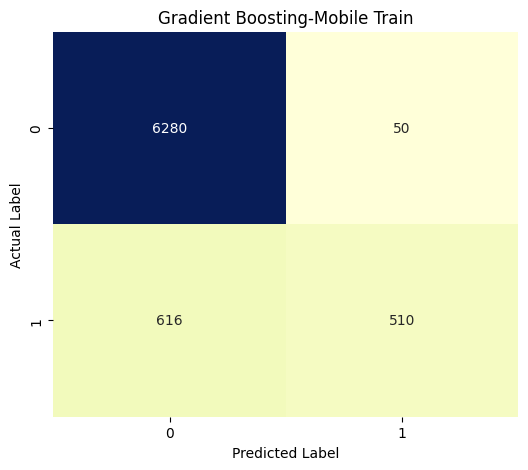

In [166]:
confusion_matrix(y_train,y_train_predict)
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_train,y_train_predict),annot=True, fmt='d',cbar=False, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Gradient Boosting-Mobile Train')
plt.show()

In [167]:
y_test_predict = gbc_model.predict(X_test)
gbc_model_score = gbc_model.score(X_test, y_test)
print(gbc_model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))   

0.9026908635794744
[[2676   26]
 [ 285  209]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.95      2702
           1       0.89      0.42      0.57       494

    accuracy                           0.90      3196
   macro avg       0.90      0.71      0.76      3196
weighted avg       0.90      0.90      0.89      3196



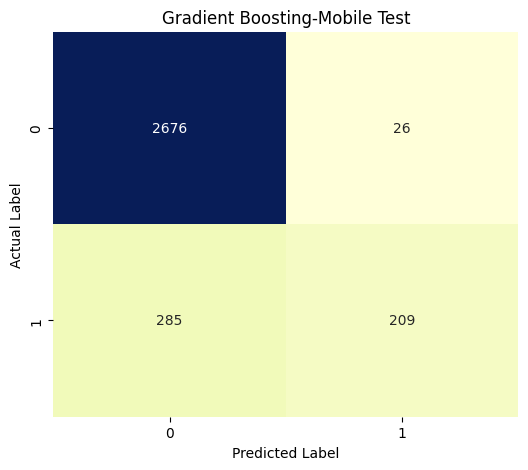

In [168]:
confusion_matrix(y_test,y_test_predict)
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test,y_test_predict),annot=True, fmt='d',cbar=False, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Gradient Boosting-Mobile Test')
plt.show()

In [169]:
#Extreme Gradient Boosting Machine(XG-BOOST)
clfXGB=xgb.XGBClassifier()
clfXGB.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

1.0


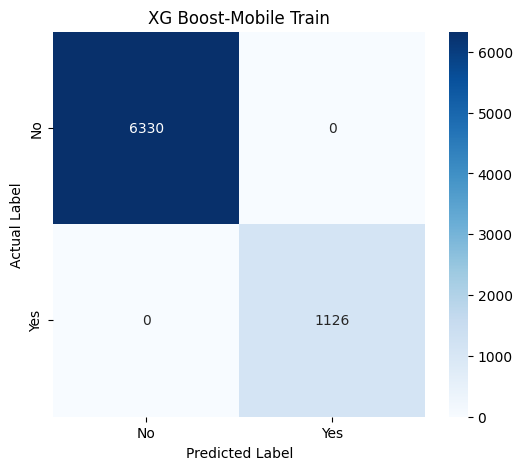

In [170]:
y_predict = clfXGB.predict(X_train)
print(clfXGB.score(X_train, y_train))
cm=metrics.confusion_matrix(y_train, y_predict,labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]], columns = [i for i in ["No","Yes"]])
plt.figure(figsize=(6,5))
sns.heatmap(df_cm, annot=True ,fmt='g',cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('XG Boost-Mobile Train')
plt.show()

In [171]:
y_pred=clfXGB.predict(X_train)
model_scoreXGB=clfXGB.score(X_train,y_train)
print(model_scoreXGB)
print(metrics.confusion_matrix(y_train,y_pred))
print(metrics.classification_report(y_train, y_pred))

1.0
[[6330    0]
 [   0 1126]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6330
           1       1.00      1.00      1.00      1126

    accuracy                           1.00      7456
   macro avg       1.00      1.00      1.00      7456
weighted avg       1.00      1.00      1.00      7456



0.9893617021276596


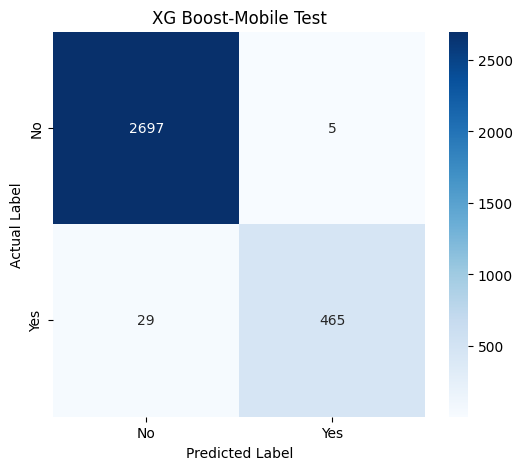

In [172]:
y_predict = clfXGB.predict(X_test)
print(clfXGB.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]], columns = [i for i in ["No","Yes"]])
plt.figure(figsize=(6,5))
sns.heatmap(df_cm, annot=True ,fmt='g',cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('XG Boost-Mobile Test')
plt.show()

In [173]:
#clfXGB=xgb.XGBClassifier(n_estimators=1000,learning_rate=0.01,max_depth=9)
y_pred=clfXGB.predict(X_test)
model_scoreXGB=clfXGB.score(X_test,y_test)
print(model_scoreXGB)
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test, y_pred))

0.9893617021276596
[[2697    5]
 [  29  465]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2702
           1       0.99      0.94      0.96       494

    accuracy                           0.99      3196
   macro avg       0.99      0.97      0.98      3196
weighted avg       0.99      0.99      0.99      3196



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC: 1.000


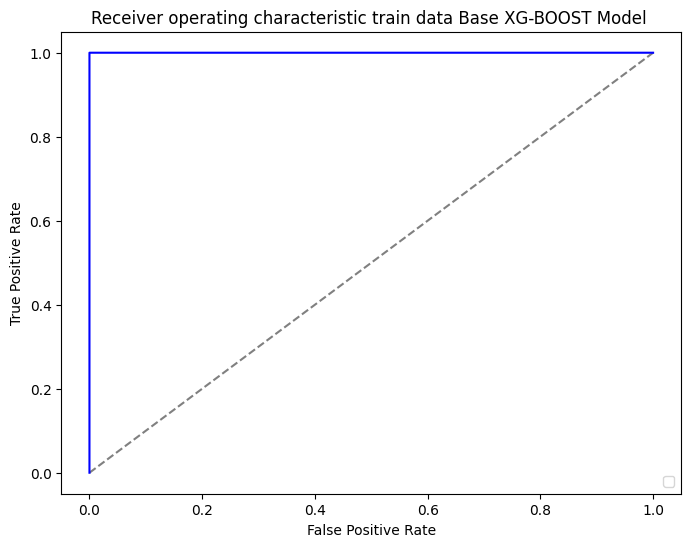

In [174]:
#predict probabilities
probs = clfXGB.predict_proba(X_train)
probs = probs[:, 1]
train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % train_auc)
train_fpr,train_tpr,train_thresholds = roc_curve(y_train, probs)
plt.figure(figsize=(8,6)) 
plt.plot([0, 1], [0, 1], linestyle='--',color='gray')
#plot ROC curve for the model
plt.plot(train_fpr, train_tpr,color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic train data Base XG-BOOST Model ')
plt.legend(loc="lower right")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC: 0.999


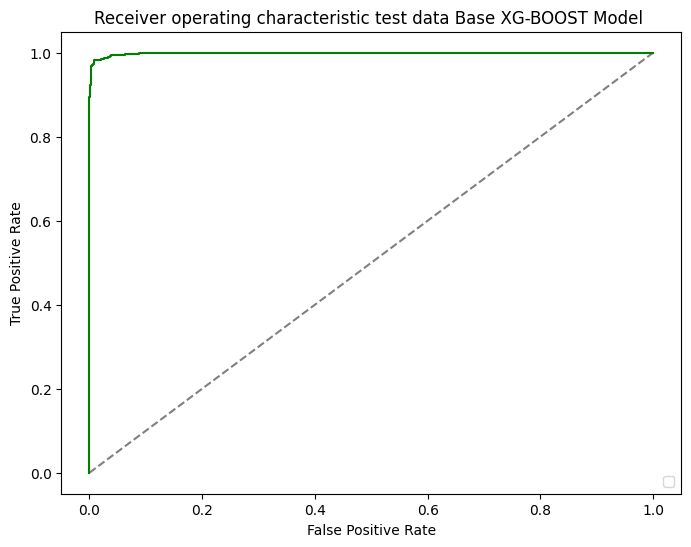

In [175]:
#predict probabilities
probs = clfXGB.predict_proba(X_test)
probs = probs[:, 1]
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
test_fpr,test_tpr,test_thresholds = roc_curve(y_test, probs)
plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], linestyle='--',color='gray')
#plot ROC curve for the model
plt.plot(test_fpr, test_tpr,color='green')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic test data Base XG-BOOST Model ')
plt.legend(loc="lower right")
plt.show()

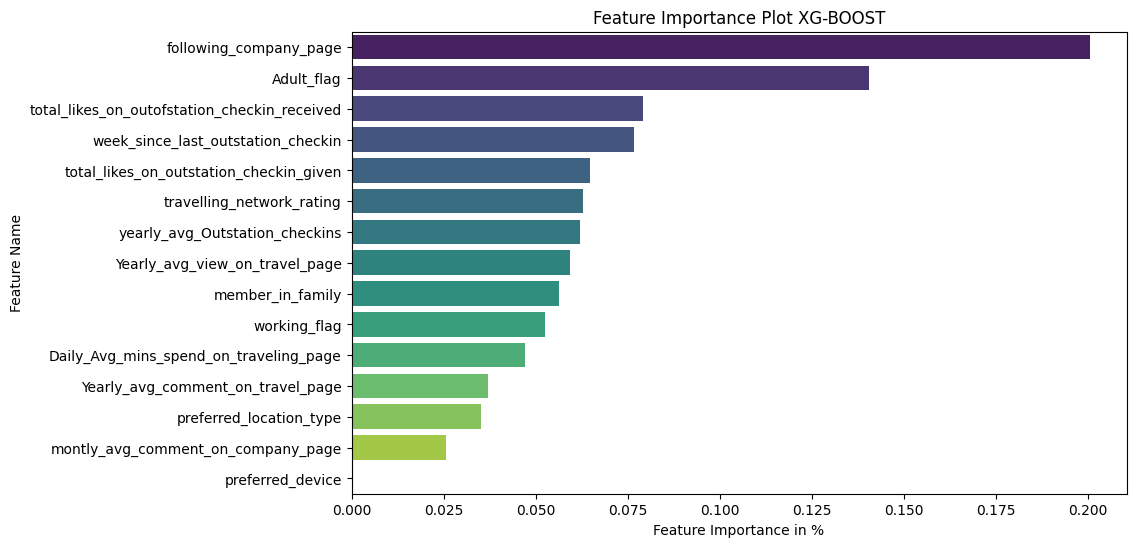

In [176]:
x=pd.DataFrame(clfXGB.feature_importances_,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=x[0], y=x.index, palette='viridis')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot XG-BOOST')
plt.show()

In [177]:
#XG boost After hyperparameter Tune model 1
clfXGB=xgb.XGBClassifier(n_estimators=500,learning_rate=0.01,max_depth=5)
clfXGB.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

0.9383047210300429


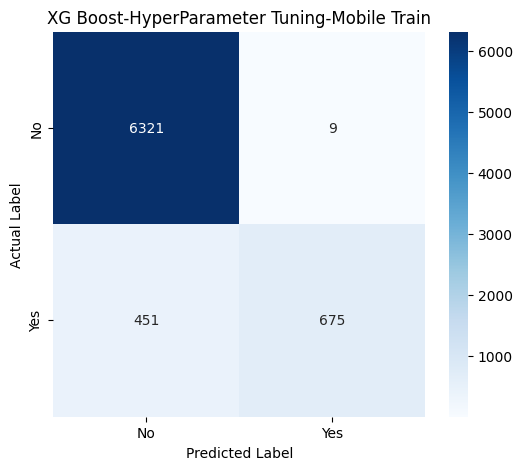

In [178]:
y_predict = clfXGB.predict(X_train)
print(clfXGB.score(X_train, y_train))
cm=metrics.confusion_matrix(y_train, y_predict,labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]], columns = [i for i in ["No","Yes"]])
plt.figure(figsize=(6,5))
sns.heatmap(df_cm, annot=True ,fmt='g',cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('XG Boost-HyperParameter Tuning-Mobile Train')
plt.show()

In [179]:
y_pred=clfXGB.predict(X_train)
model_scoreXGB=clfXGB.score(X_train,y_train)
print(model_scoreXGB)
print(metrics.confusion_matrix(y_train,y_pred))
print(metrics.classification_report(y_train, y_pred))

0.9383047210300429
[[6321    9]
 [ 451  675]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      6330
           1       0.99      0.60      0.75      1126

    accuracy                           0.94      7456
   macro avg       0.96      0.80      0.86      7456
weighted avg       0.94      0.94      0.93      7456



0.9224030037546934


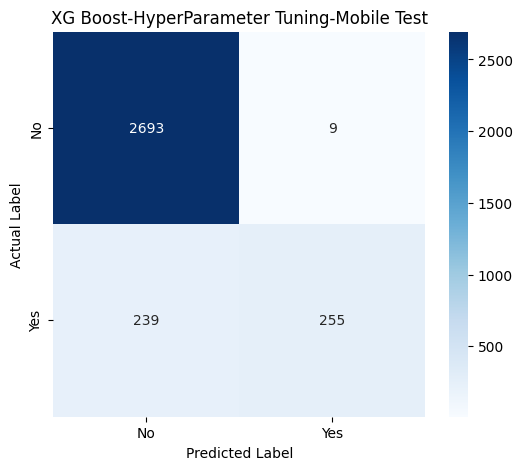

In [180]:
y_predict = clfXGB.predict(X_test)
print(clfXGB.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]], columns = [i for i in ["No","Yes"]])
plt.figure(figsize=(6,5))
sns.heatmap(df_cm, annot=True ,fmt='g',cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('XG Boost-HyperParameter Tuning-Mobile Test')
plt.show()

In [181]:
#clfXGB=xgb.XGBClassifier(n_estimators=1000,learning_rate=0.01,max_depth=9)
y_pred=clfXGB.predict(X_test)
model_scoreXGB=clfXGB.score(X_test,y_test)
print(model_scoreXGB)
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test, y_pred))

0.9224030037546934
[[2693    9]
 [ 239  255]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2702
           1       0.97      0.52      0.67       494

    accuracy                           0.92      3196
   macro avg       0.94      0.76      0.81      3196
weighted avg       0.93      0.92      0.91      3196



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC: 0.984


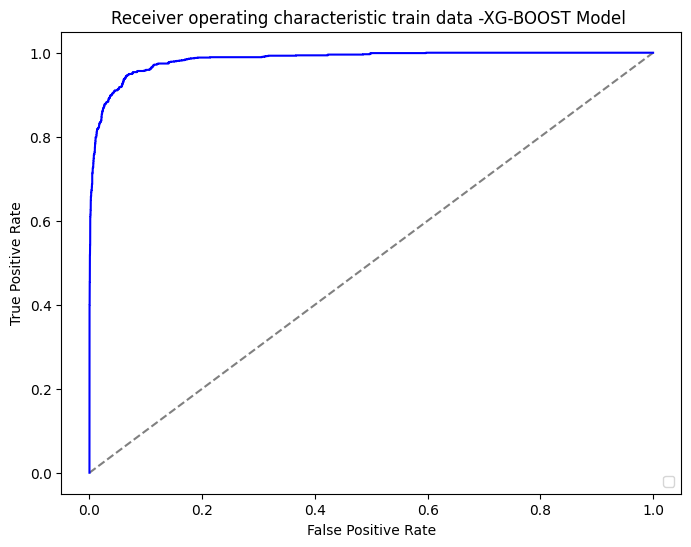

In [182]:
#predict probabilities
probs = clfXGB.predict_proba(X_train)
probs = probs[:, 1]
train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % train_auc)
train_fpr,train_tpr,train_thresholds = roc_curve(y_train, probs)
plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], linestyle='--',color='gray')
#plot ROC curve for the model
plt.plot(train_fpr, train_tpr,color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic train data -XG-BOOST Model ')
plt.legend(loc="lower right")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC: 0.966


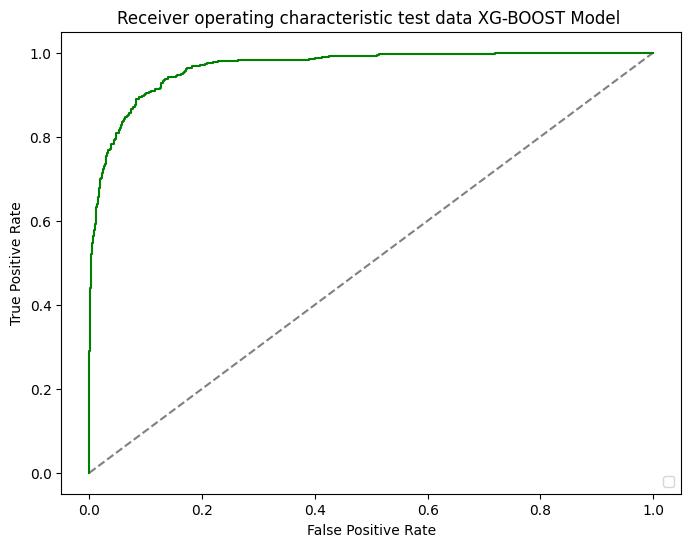

In [183]:
#predict probabilities
probs = clfXGB.predict_proba(X_test)
probs = probs[:, 1]
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
test_fpr,test_tpr,test_thresholds = roc_curve(y_test, probs)
plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], linestyle='--',color='gray')
#plot ROC curve for the model
plt.plot(test_fpr, test_tpr,color='green')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic test data XG-BOOST Model ')
plt.legend(loc="lower right")
plt.show()

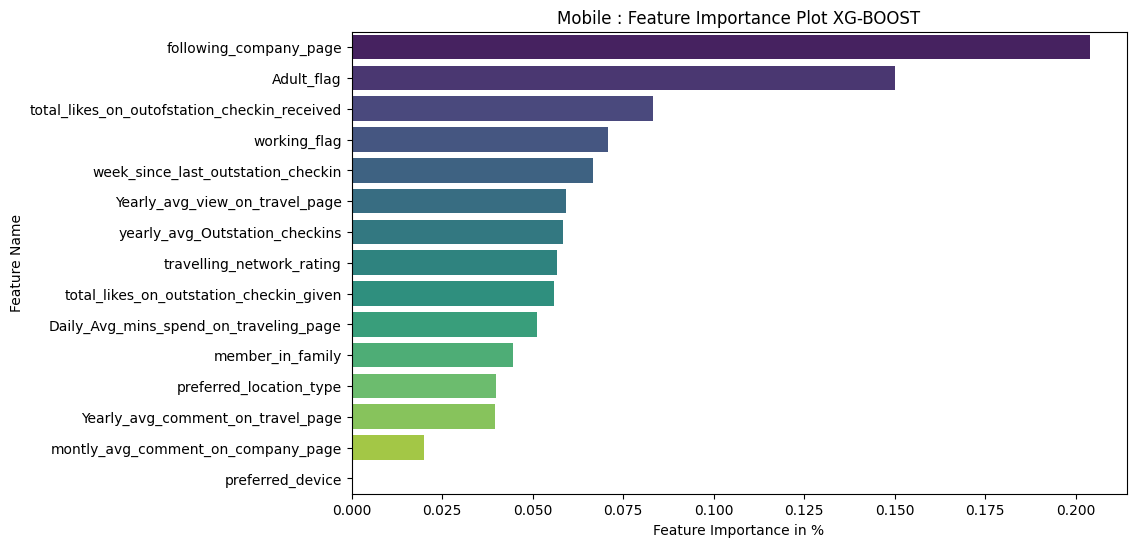

In [184]:
x=pd.DataFrame(clfXGB.feature_importances_,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=x[0], y=x.index, palette='viridis')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Mobile : Feature Importance Plot XG-BOOST')
plt.show()

In [185]:
#SMOTE
sm = SMOTE()
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
X_train_res.shape

(12660, 15)

In [186]:
#LOGIT
smote_log_model = LogisticRegression()
smote_log_model.fit(X_train_res, y_train_res)

LogisticRegression()

In [187]:
smote_log_train_predict = smote_log_model.predict(X_train_res)
smote_log_test_predict = smote_log_model.predict(X_test)
smote_log_train_predict = smote_log_model.predict(X_train_res)
model_score = smote_log_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, smote_log_train_predict))
print(metrics.classification_report(y_train_res ,smote_log_train_predict))

0.6336492890995261
[[3803 2527]
 [2111 4219]]
              precision    recall  f1-score   support

           0       0.64      0.60      0.62      6330
           1       0.63      0.67      0.65      6330

    accuracy                           0.63     12660
   macro avg       0.63      0.63      0.63     12660
weighted avg       0.63      0.63      0.63     12660



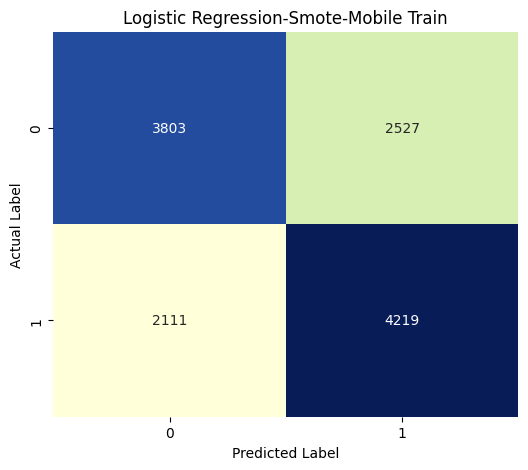

In [188]:
confusion_matrix(y_train_res, smote_log_train_predict)
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_train_res, smote_log_train_predict),annot=True, fmt='d',cbar=False, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Logistic Regression-Smote-Mobile Train')
plt.show()

In [189]:
smote_log_test_predict = smote_log_model.predict(X_test)
model_score = smote_log_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, smote_log_test_predict))
print(metrics.classification_report(y_test ,smote_log_test_predict))

0.6091989987484355
[[1614 1088]
 [ 161  333]]
              precision    recall  f1-score   support

           0       0.91      0.60      0.72      2702
           1       0.23      0.67      0.35       494

    accuracy                           0.61      3196
   macro avg       0.57      0.64      0.53      3196
weighted avg       0.80      0.61      0.66      3196



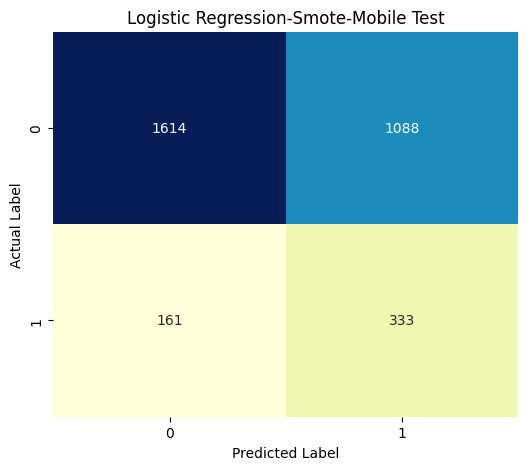

In [190]:
confusion_matrix(y_test, smote_log_test_predict)
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, smote_log_test_predict),annot=True, fmt='d',cbar=False, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Logistic Regression-Smote-Mobile Test')
plt.show()

In [191]:
#LDA
smote_lda_model = LinearDiscriminantAnalysis()
smote_lda_model.fit(X_train_res, y_train_res)

LinearDiscriminantAnalysis()

In [192]:
smote_lda_train_predict = smote_lda_model.predict(X_train_res)
smote_lda_test_predict = smote_lda_model.predict(X_test)
smote_lda_train_predict = smote_lda_model.predict(X_train_res)
model_score = smote_log_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, smote_lda_train_predict))
print(metrics.classification_report(y_train_res ,smote_lda_train_predict))

0.6336492890995261
[[4473 1857]
 [1567 4763]]
              precision    recall  f1-score   support

           0       0.74      0.71      0.72      6330
           1       0.72      0.75      0.74      6330

    accuracy                           0.73     12660
   macro avg       0.73      0.73      0.73     12660
weighted avg       0.73      0.73      0.73     12660



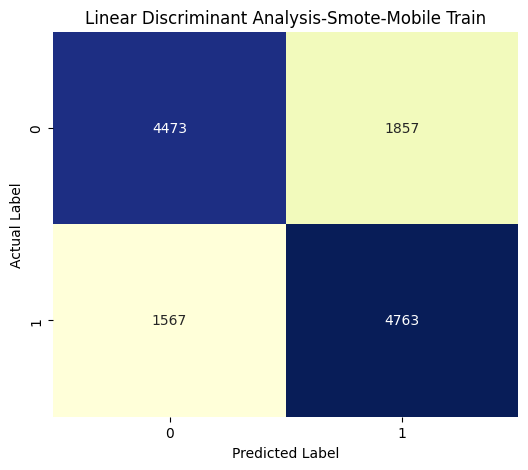

In [193]:
confusion_matrix(y_train_res, smote_lda_train_predict)
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_train_res, smote_lda_train_predict),annot=True, fmt='d',cbar=False, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Linear Discriminant Analysis-Smote-Mobile Train')
plt.show()

In [194]:
smote_log_test_predict = smote_lda_model.predict(X_test)
model_score = smote_lda_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, smote_lda_test_predict))
print(metrics.classification_report(y_test ,smote_lda_test_predict))

0.7152690863579474
[[1903  799]
 [ 111  383]]
              precision    recall  f1-score   support

           0       0.94      0.70      0.81      2702
           1       0.32      0.78      0.46       494

    accuracy                           0.72      3196
   macro avg       0.63      0.74      0.63      3196
weighted avg       0.85      0.72      0.75      3196



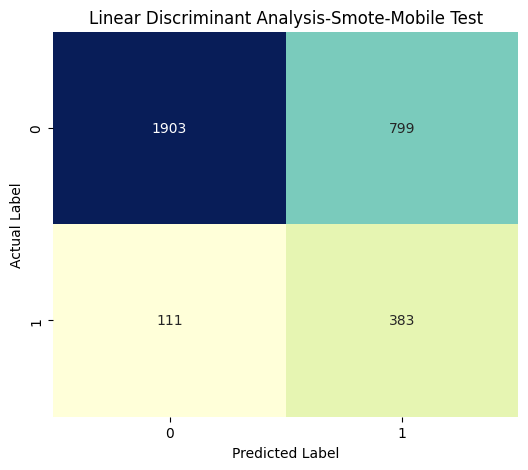

In [195]:
confusion_matrix(y_test, smote_lda_test_predict)
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, smote_lda_test_predict),annot=True, fmt='d',cbar=False, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Linear Discriminant Analysis-Smote-Mobile Test')
plt.show()

In [196]:
#KNN
Smote_KNN = KNeighborsClassifier(n_neighbors=3)
Smote_KNN.fit(X_train_res, y_train_res)

KNeighborsClassifier(n_neighbors=3)

In [197]:
Smote_KNN_train_predict = Smote_KNN.predict(X_train_res)
Smote_KNN_test_predict = Smote_KNN.predict(X_test)
Smote_KNN_train_predict = Smote_KNN.predict(X_train_res)
model_score = Smote_KNN.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, Smote_KNN_train_predict))
print(metrics.classification_report(y_train_res ,Smote_KNN_train_predict))

0.9924960505529226
[[6296   34]
 [  61 6269]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6330
           1       0.99      0.99      0.99      6330

    accuracy                           0.99     12660
   macro avg       0.99      0.99      0.99     12660
weighted avg       0.99      0.99      0.99     12660



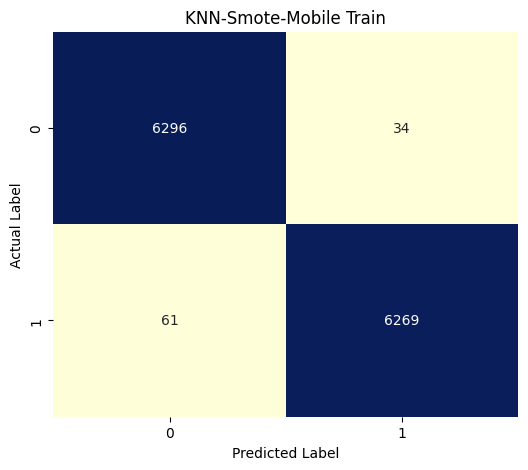

In [198]:
confusion_matrix(y_train_res, Smote_KNN_train_predict)
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_train_res, Smote_KNN_train_predict),annot=True, fmt='d',cbar=False, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('KNN-Smote-Mobile Train')
plt.show()

In [199]:
smote_log_test_predict = Smote_KNN.predict(X_test)
model_score = Smote_KNN.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, smote_log_test_predict))
print(metrics.classification_report(y_test ,smote_log_test_predict))

0.9809136420525657
[[2654   48]
 [  13  481]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2702
           1       0.91      0.97      0.94       494

    accuracy                           0.98      3196
   macro avg       0.95      0.98      0.96      3196
weighted avg       0.98      0.98      0.98      3196



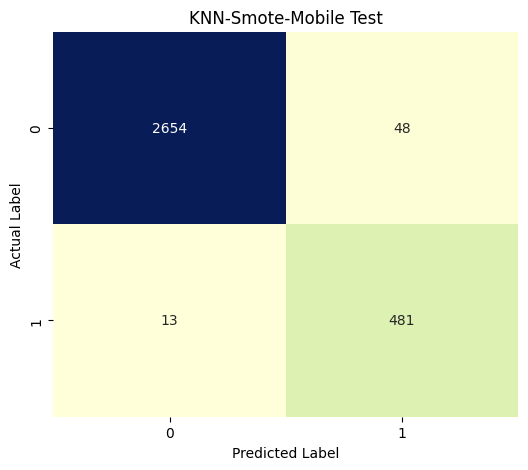

In [200]:
confusion_matrix(y_test, smote_log_test_predict)
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, smote_log_test_predict),annot=True, fmt='d',cbar=False, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('KNN-Smote-Mobile Test')
plt.show()

In [201]:
#RF
Smote_RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
Smote_RF_model=Smote_RF_model.fit(X_train_res, y_train_res)
Smote_RF_train_predict = Smote_RF_model.predict(X_train_res)
Smote_RF_test_predict = Smote_RF_model.predict(X_test)
Smote_RF_train_predict = Smote_RF_model.predict(X_train_res)
model_score = Smote_RF_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, Smote_RF_train_predict))
print(metrics.classification_report(y_train_res ,Smote_RF_train_predict))

1.0
[[6330    0]
 [   0 6330]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6330
           1       1.00      1.00      1.00      6330

    accuracy                           1.00     12660
   macro avg       1.00      1.00      1.00     12660
weighted avg       1.00      1.00      1.00     12660



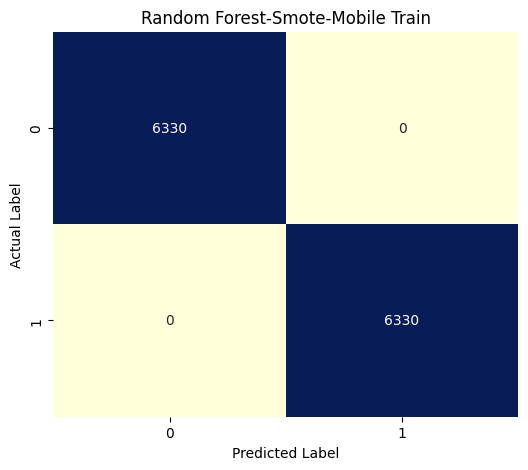

In [202]:
confusion_matrix(y_train_res, Smote_RF_train_predict)
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_train_res, Smote_RF_train_predict),annot=True, fmt='d',cbar=False, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Random Forest-Smote-Mobile Train')
plt.show()

In [203]:
Smote_RF_test_predict = Smote_RF_model.predict(X_test)
model_score = Smote_RF_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, Smote_RF_test_predict))
print(metrics.classification_report(y_test ,Smote_RF_test_predict))

0.9831038798498123
[[2691   11]
 [  43  451]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2702
           1       0.98      0.91      0.94       494

    accuracy                           0.98      3196
   macro avg       0.98      0.95      0.97      3196
weighted avg       0.98      0.98      0.98      3196



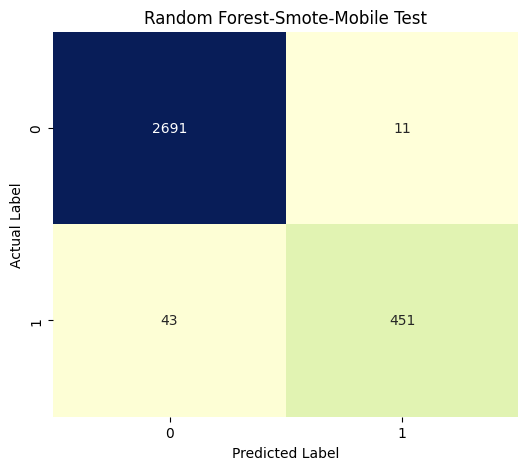

In [204]:
confusion_matrix(y_test, Smote_RF_test_predict)
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, Smote_RF_test_predict),annot=True, fmt='d',cbar=False, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Random Forest-Smote-Mobile Test')
plt.show()